# Introduction


**HELP International** is an international humanitarian NGO that is committed to fighting poverty and providing the people of backward countries with basic amenities and relief during the time of disasters and natural calamities. It runs a lot of operational projects from time to time along with advocacy drives to raise awareness as well as for funding purposes.

 
After the recent funding programmes, they have been able to raise around $ 10 million. Now the CEO of the NGO needs to decide how to use this money strategically and effectively. The significant issues that come while making this decision are mostly related to choosing the countries that are in the direst need of aid. 


Thus a Data Scient is required here. Our job is to categorise the countries using some socio-economic and health factors that determine the overall development of the country. Then I  need to suggest the countries which the CEO needs to focus on the most. 

In [1953]:
#importing all required libraries

import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import datetime as dt

import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree


## Data Collection

In [1954]:
country_df = pd.read_csv("D:\Country-data.csv", sep = "," , encoding = "ISO-8859-1", header = 0)

In [1955]:
country_df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


## Data Inspection

In [1956]:
country_df.shape

(167, 10)

In [1957]:
country_df.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


In [1958]:
country_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


# Data Cleaning

In [1959]:
country_df.isnull().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

In [1960]:
country_df.shape

(167, 10)

In [1961]:
len(list(country_df['country'].unique()))

167

There is no Null/Missing value in the dataset.

# Exploratory Data Analysis

## Data Preparation

Since the features like exports, imports and health are given as a percentage of their respective GDPPs, Let us convert these values as percentage values would not potray a clear picture. For example, the percenatge values of imports of two countries may be same, but since there is a difference in the GDPP , the imports values will acordingly vary.


In [1962]:
# Converting exports,imports and health spending percentages to absolute values.

country_df['exports'] = country_df['exports'] * country_df['gdpp']/100
country_df['imports'] = country_df['imports'] * country_df['gdpp']/100
country_df['health'] = country_df['health'] * country_df['gdpp']/100

Lets have a look at the Data after we have changed the values for imports , exports and health

In [1963]:
country_df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200


## Univariate Analysis

We need to choose the countries that are in the direst need of aid. Hence, we need to identify those countries with using some socio-economic and health factors that determine the overall development of the country.


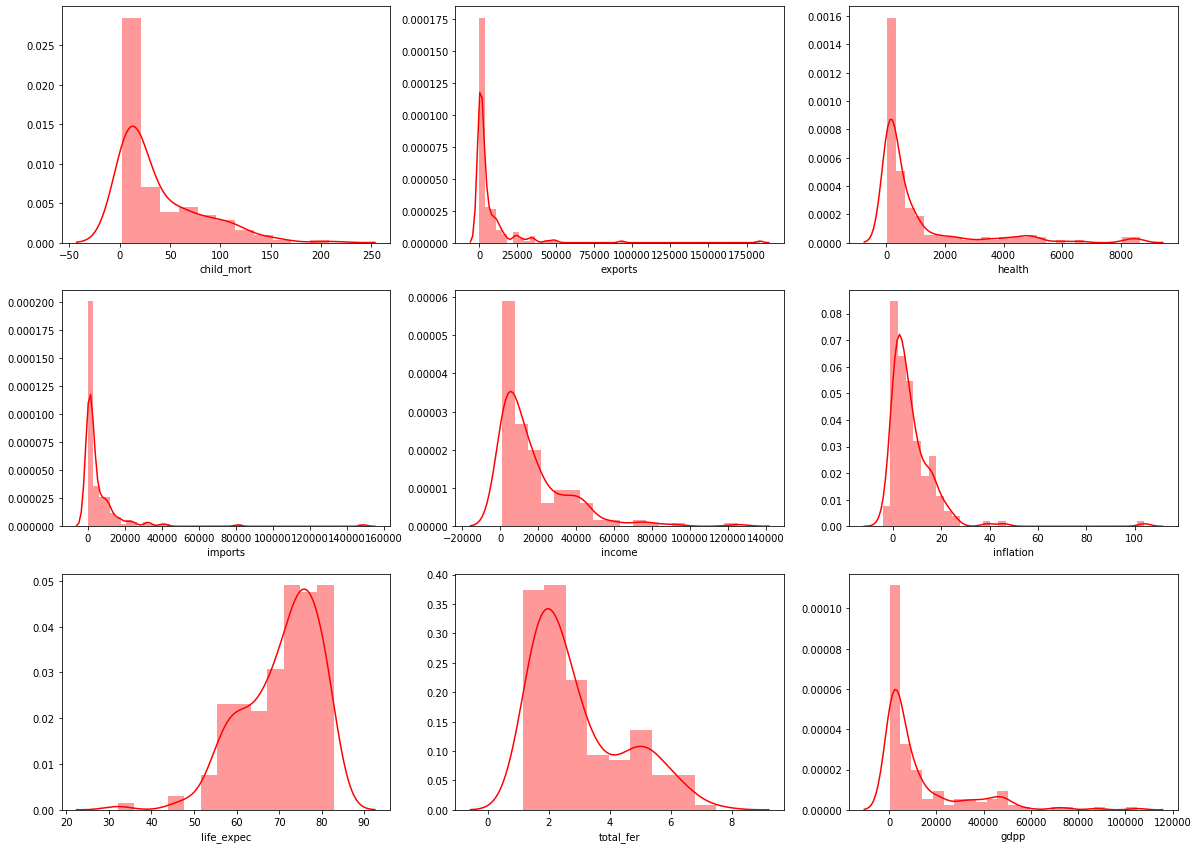

In [1964]:
plt.figure(figsize = (20,20))
columns =['child_mort', 'exports', 'health', 'imports', 'income','inflation', 'life_expec', 'total_fer', 'gdpp']
for i in enumerate(columns):
    plt.subplot(4,3,i[0]+1)
    sns.distplot(country_df[i[1]], color='r')

Let us look at the child mortality rates across all countries

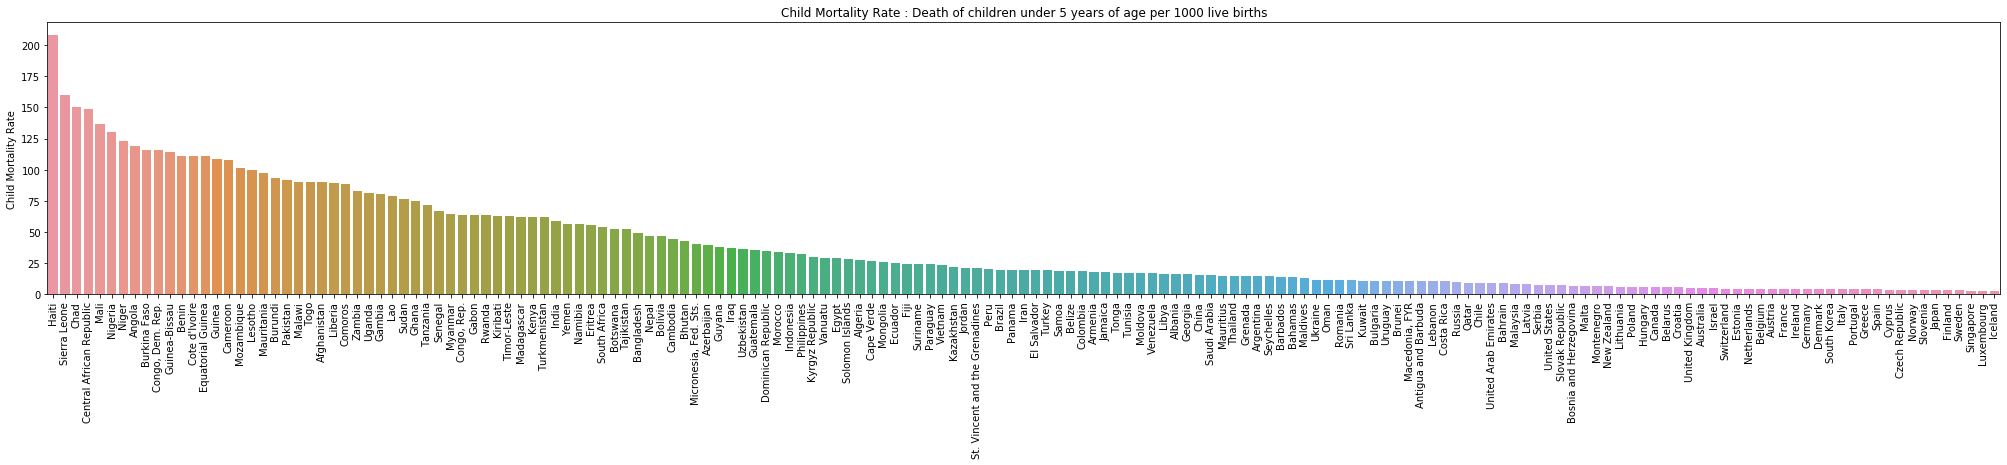

In [1965]:
# Child Mortality Rate that is the death of children under 5 years of age per 1000 live births

plt.figure(figsize = (35,5))
child_mort = country_df[['country','child_mort']].sort_values('child_mort', ascending = False)
ax = sns.barplot(x='country', y='child_mort', data= child_mort)
ax.set(xlabel = '', ylabel= 'Child Mortality Rate')
ax.set_title('Child Mortality Rate : Death of children under 5 years of age per 1000 live births')
plt.xticks(rotation=90)
plt.show()

We can see that the child mortality rates are varying across the countries.

Let us now see the Top 10 countries with Highest Child mortality rates

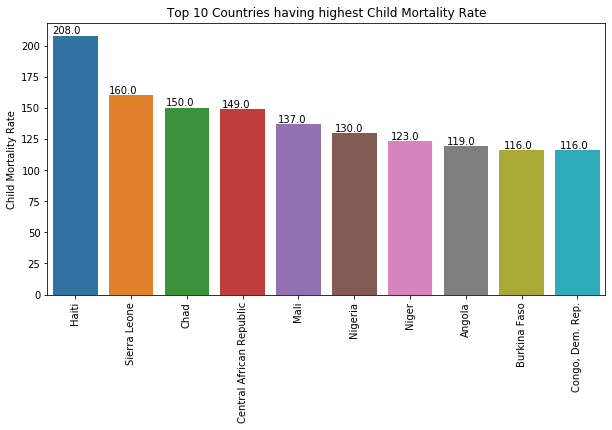

In [1966]:
#op 10 Countries having highest Child Mortality Rate
plt.figure(figsize = (10,5))
child_mort_top10 = country_df[['country','child_mort']].sort_values('child_mort', ascending = False).head(10)
ax = sns.barplot(x='country', y='child_mort', data= child_mort_top10)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
ax.set(xlabel = '', ylabel= 'Child Mortality Rate')
ax.set_title('Top 10 Countries having highest Child Mortality Rate')
plt.xticks(rotation=90)
plt.show()

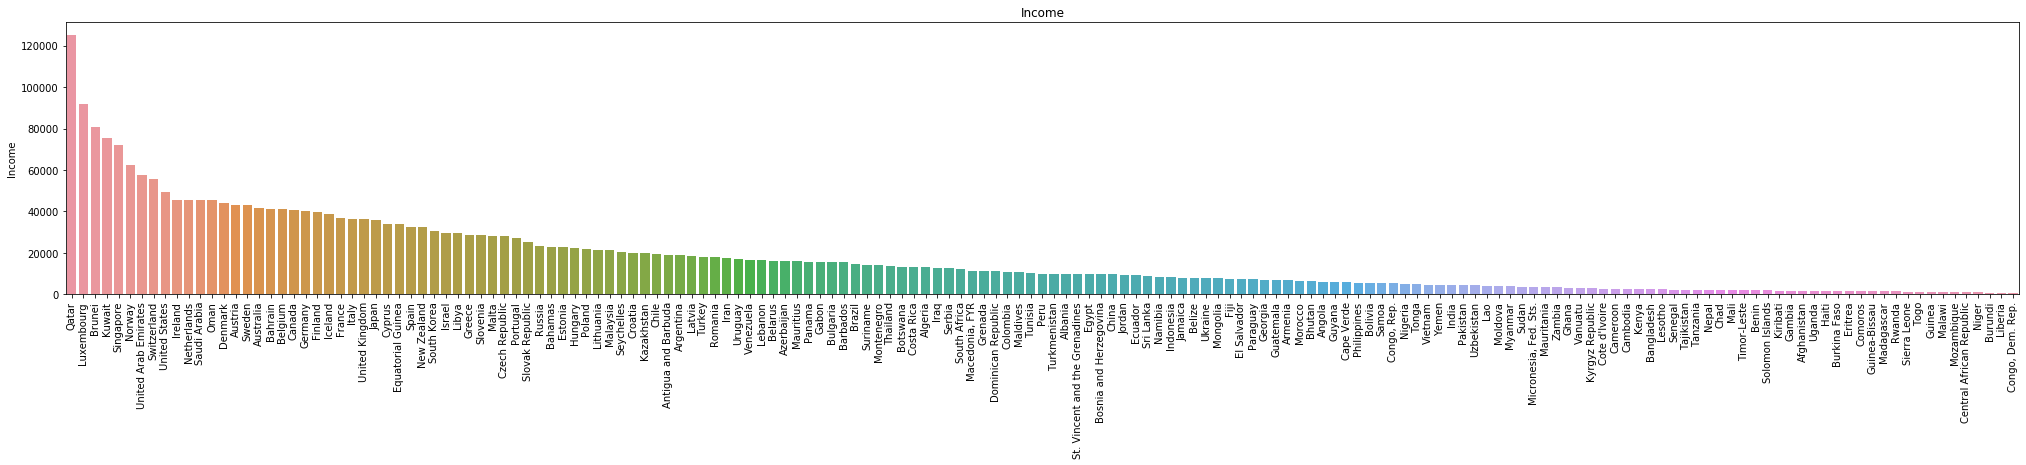

In [1967]:
# Income : Net Income Per person for all the Countries

plt.figure(figsize = (35,5))
child_mort = country_df[['country','income']].sort_values('income', ascending = False)
ax = sns.barplot(x='country', y='income', data= child_mort)
ax.set(xlabel = '', ylabel= 'Income')
ax.set_title('Income')
plt.xticks(rotation=90)
plt.show()

 The graph show the Income per person for all the countries and we see that it is distributed across all countries and is not uniform
 
 Also , let us examine the countries with least incomes per person

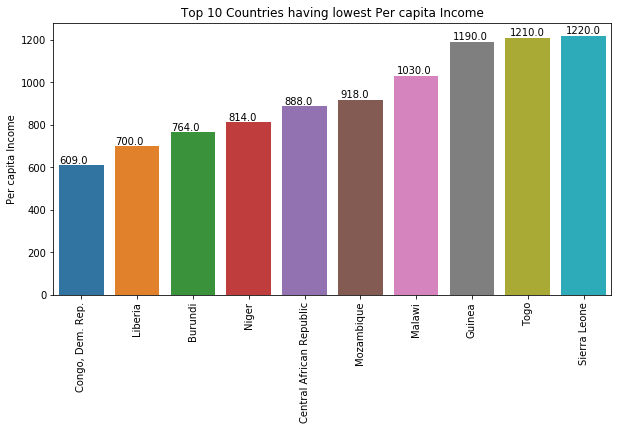

In [1968]:
#Top 10 Countries having lowest Per capita Income
plt.figure(figsize = (10,5))
income_bottom10 = country_df[['country','income']].sort_values('income', ascending = True).head(10)
ax = sns.barplot(x='country', y='income', data= income_bottom10)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
ax.set(xlabel = '', ylabel= 'Per capita Income')
ax.set_title("Top 10 Countries having lowest Per capita Income")
plt.xticks(rotation=90)
plt.show()

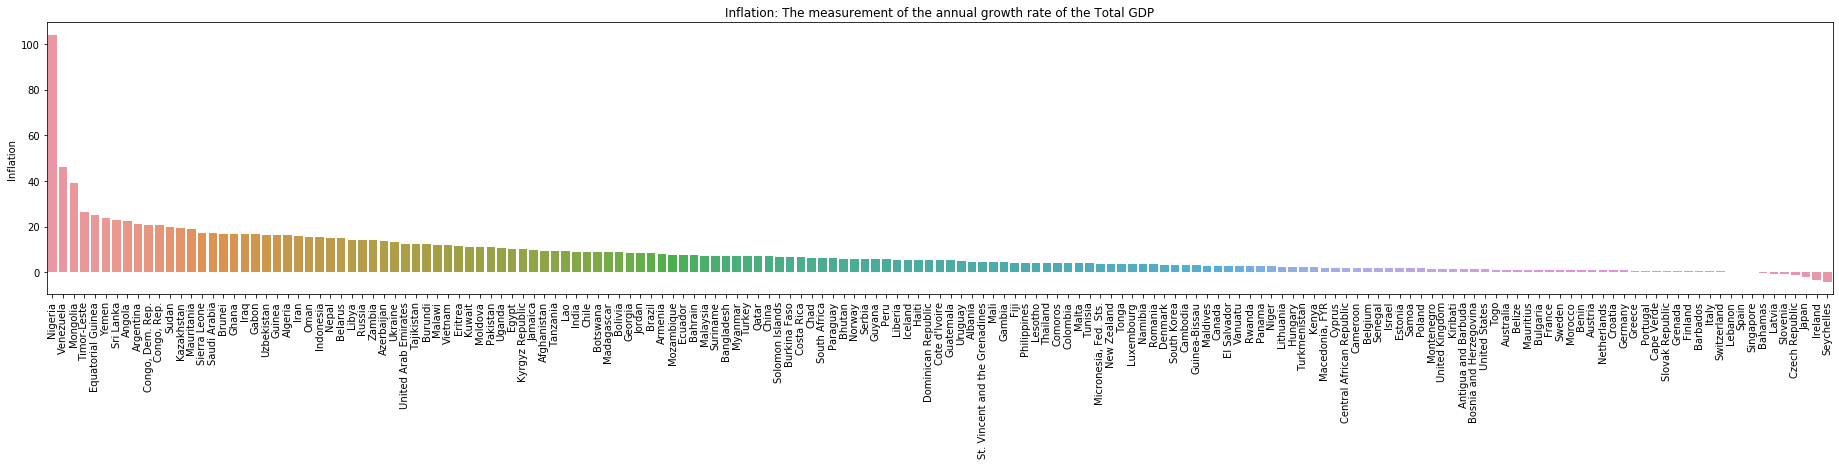

In [1969]:
# Inflation: The measurement of the annual growth rate of the Total GDP
plt.figure(figsize = (32,5))
inflation = country_df[['country','inflation']].sort_values('inflation', ascending = False)
ax = sns.barplot(x='country', y='inflation', data= inflation)
ax.set(xlabel = '', ylabel= 'Inflation')
ax.set_title("Inflation: The measurement of the annual growth rate of the Total GDP")
plt.xticks(rotation=90)
plt.show()

Graph show inflation in all the countries

Lets find out Top 10 countries with highest Inflations

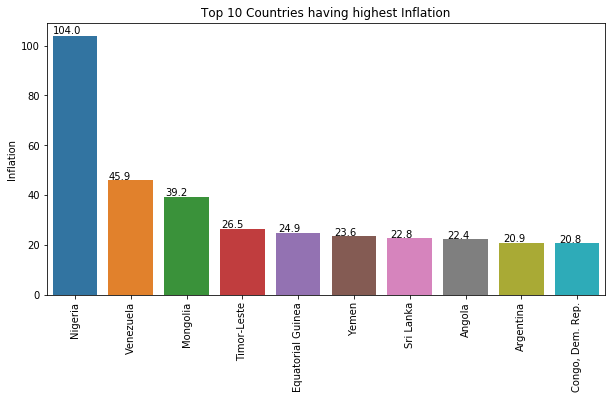

In [1970]:
#Top 10 Countries having highest Inflation
plt.figure(figsize = (10,5))
inflation_top10 = country_df[['country','inflation']].sort_values('inflation', ascending = False).head(10)
ax = sns.barplot(x='country', y='inflation', data= inflation_top10)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
ax.set(xlabel = '', ylabel= 'Inflation')
ax.set_title("Top 10 Countries having highest Inflation")
plt.xticks(rotation=90)
plt.show()

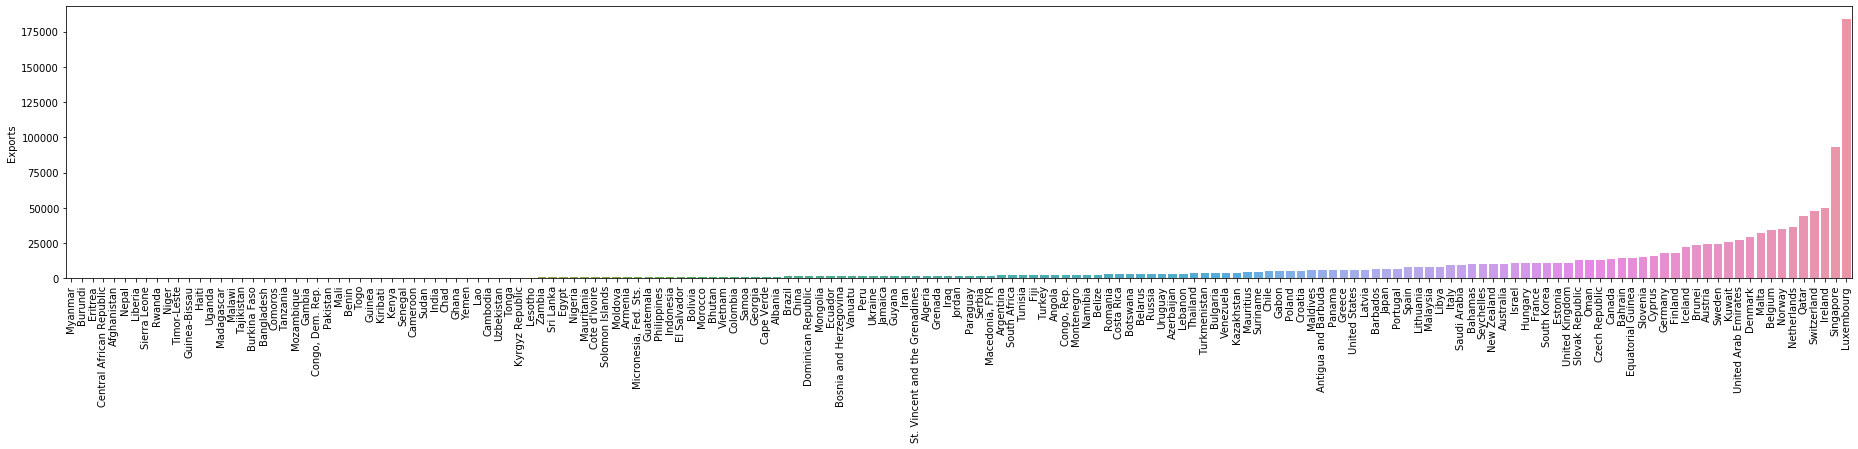

In [1971]:
# Exports: Exports of goods and services. Given as percentage of the Total GDP
plt.figure(figsize = (32,5))
exports = country_df[['country','exports']].sort_values('exports', ascending = True)
ax = sns.barplot(x='country', y='exports', data= exports)
ax.set(xlabel = '', ylabel= 'Exports')
plt.xticks(rotation=90)
plt.show()

As evident from the Graph above, most of the countries have very low exports

Lets find out the TOP 10 countries with least exports

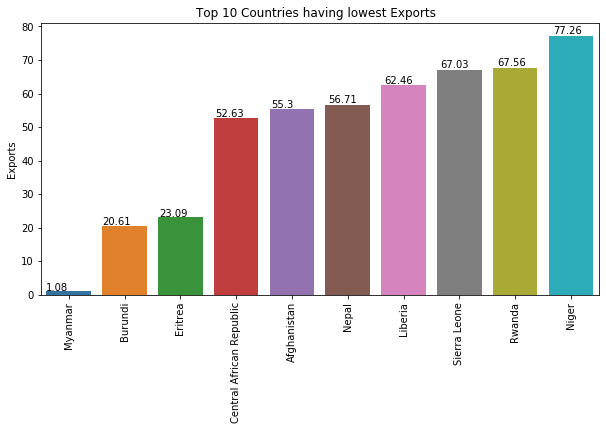

In [1972]:
#Top 10 Countries having lowest Exports are from mostly from underdeveloped / developing countries 
plt.figure(figsize = (10,5))
exports_bottom10 = country_df[['country','exports']].sort_values('exports', ascending = True).head(10)
ax = sns.barplot(x='country', y='exports', data= exports_bottom10)
for p in ax.patches:
    ax.annotate(str(round(p.get_height(),2)), (p.get_x() * 1.01 , p.get_height() * 1.01))
ax.set(xlabel = '', ylabel= 'Exports')
ax.set_title("Top 10 Countries having lowest Exports  ")
plt.xticks(rotation=90)
plt.show()

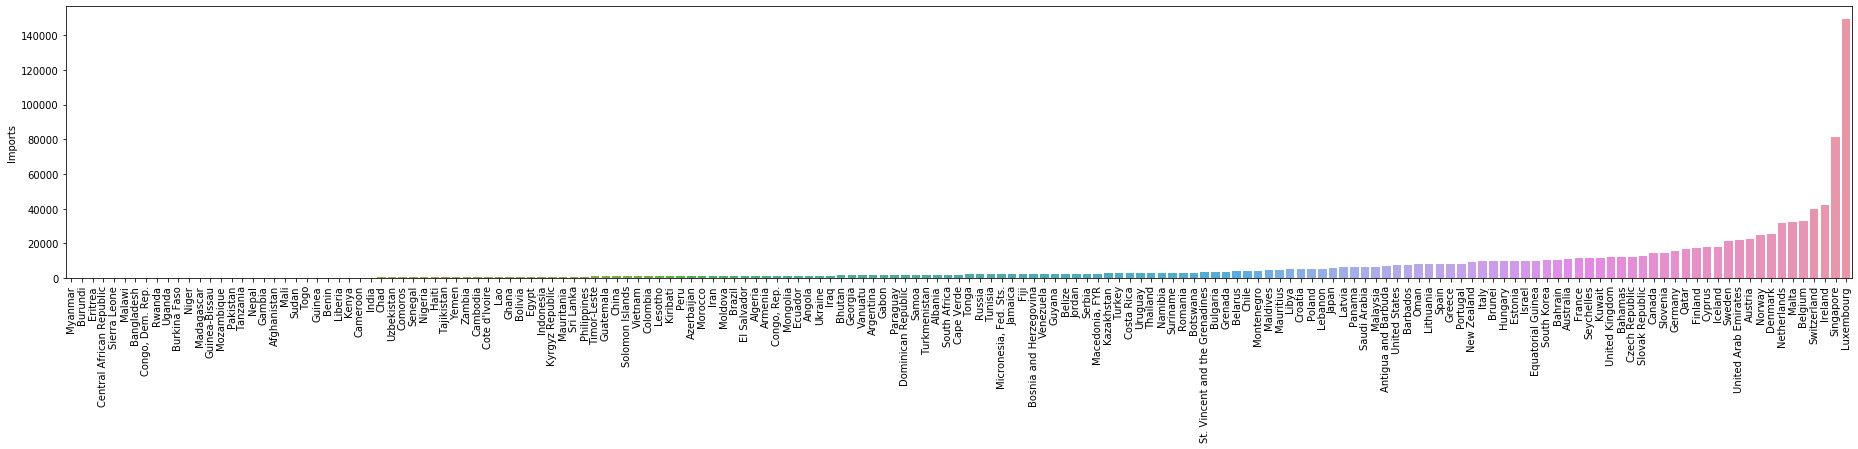

In [1973]:
# Imports: Imports of goods and services. Given as %age of the Total GDP
plt.figure(figsize = (32,5))
imports = country_df[['country','imports']].sort_values('imports', ascending = True)
ax = sns.barplot(x='country', y='imports', data= imports)
ax.set(xlabel = '', ylabel= 'Imports')
plt.xticks(rotation=90)
plt.show()

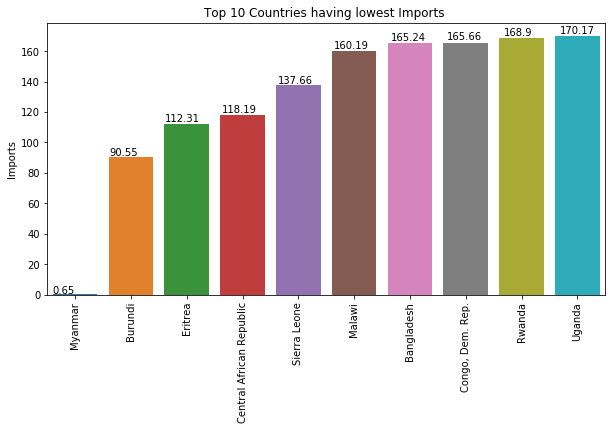

In [1974]:
#Top 10 Countries having lowest Imports 
plt.figure(figsize = (10,5))
imports_bottom10 = country_df[['country','imports']].sort_values('imports', ascending = True).head(10)
ax = sns.barplot(x='country', y='imports', data= imports_bottom10)
for p in ax.patches:
    ax.annotate(str(round(p.get_height(),2)), (p.get_x() * 1.01 , p.get_height() * 1.01))
ax.set(xlabel = '', ylabel= 'Imports')
ax.set_title("Top 10 Countries having lowest Imports ")
plt.xticks(rotation=90)
plt.show()

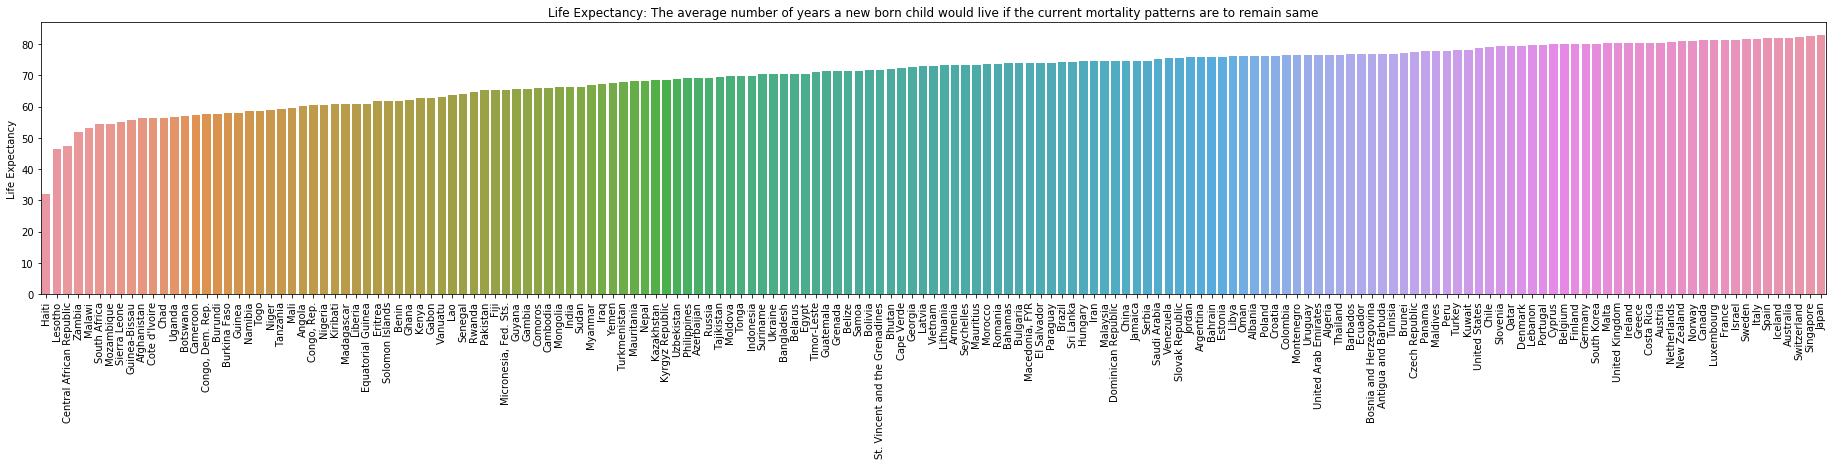

In [1975]:
# Life Expectancy: The average number of years a new born child would live if the current mortality patterns are to remain same
plt.figure(figsize = (32,5))
life_expec = country_df[['country','life_expec']].sort_values('life_expec', ascending = True)
ax = sns.barplot(x='country', y='life_expec', data= life_expec)
ax.set(xlabel = '', ylabel= 'Life Expectancy')
ax.set_title("Life Expectancy: The average number of years a new born child would live if the current mortality patterns are to remain same")
plt.xticks(rotation=90)
plt.show()

It can be observed from the above graph of life expectancy, that it is almost same across countries

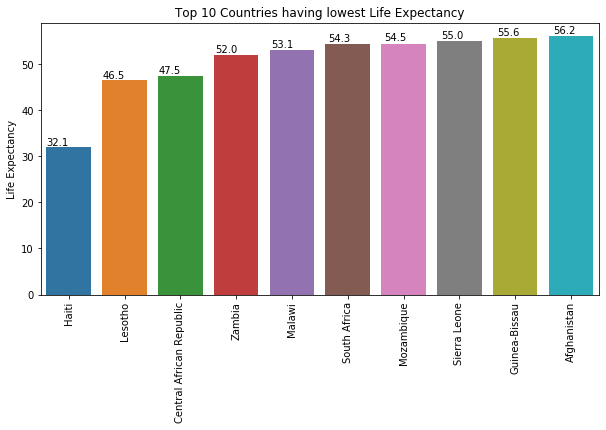

In [1976]:
#Top 10 Countries having lowest Life Expectancy
plt.figure(figsize = (10,5))
life_expec_bottom10 = country_df[['country','life_expec']].sort_values('life_expec', ascending = True).head(10)
ax = sns.barplot(x='country', y='life_expec', data= life_expec_bottom10)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
ax.set(xlabel = '', ylabel= 'Life Expectancy')
ax.set_title('Top 10 Countries having lowest Life Expectancy')
plt.xticks(rotation=90)
plt.show()

The countries with less life expectancy as more likely to have comparatively less medical and healthcare facilites

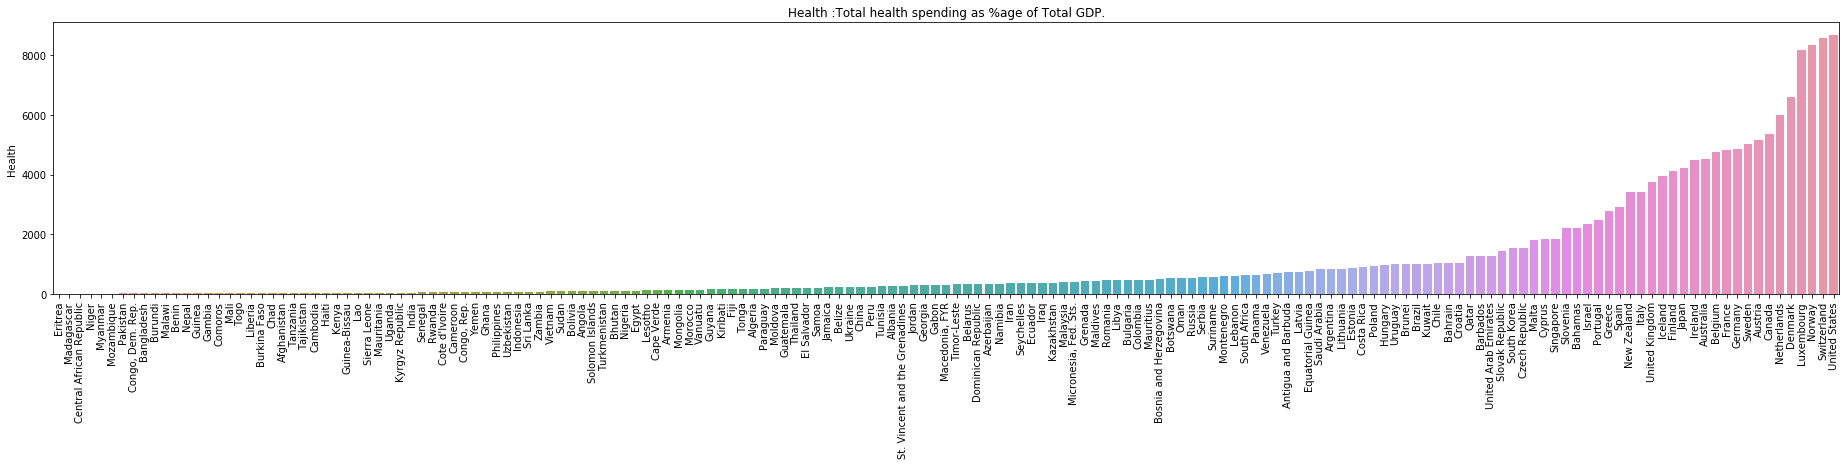

In [1977]:
# Health :Total health spending as %age of Total GDP.
plt.figure(figsize = (32,5))
health = country_df[['country','health']].sort_values('health', ascending = True)
ax = sns.barplot(x='country', y='health', data= health)
ax.set(xlabel = '', ylabel= 'Health')
ax.set_title("Health :Total health spending as %age of Total GDP.")
plt.xticks(rotation=90)
plt.show()

The spendings on health vary largley amoung the listed countries, Lets check for the countries where the spendings on the health are least

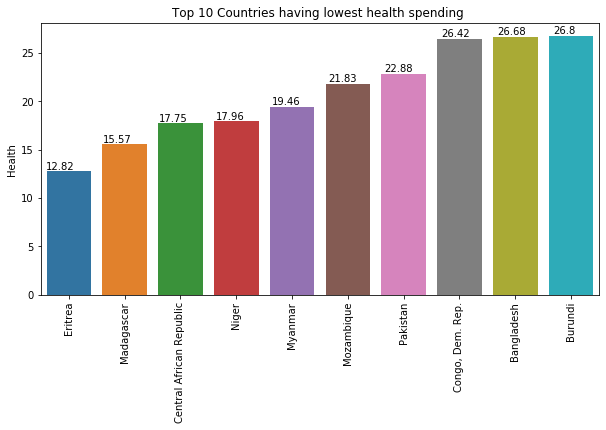

In [1978]:
#Top 10 Countries having lowest health spending 
plt.figure(figsize = (10,5))
health_bottom10 = country_df[['country','health']].sort_values('health', ascending = True).head(10)
ax = sns.barplot(x='country', y='health', data= health_bottom10)
for p in ax.patches:
    ax.annotate(str(round(p.get_height(),2)), (p.get_x() * 1.01 , p.get_height() * 1.01))
ax.set(xlabel = '', ylabel= 'Health')
ax.set_title('Top 10 Countries having lowest health spending ')
plt.xticks(rotation=90)
plt.show()

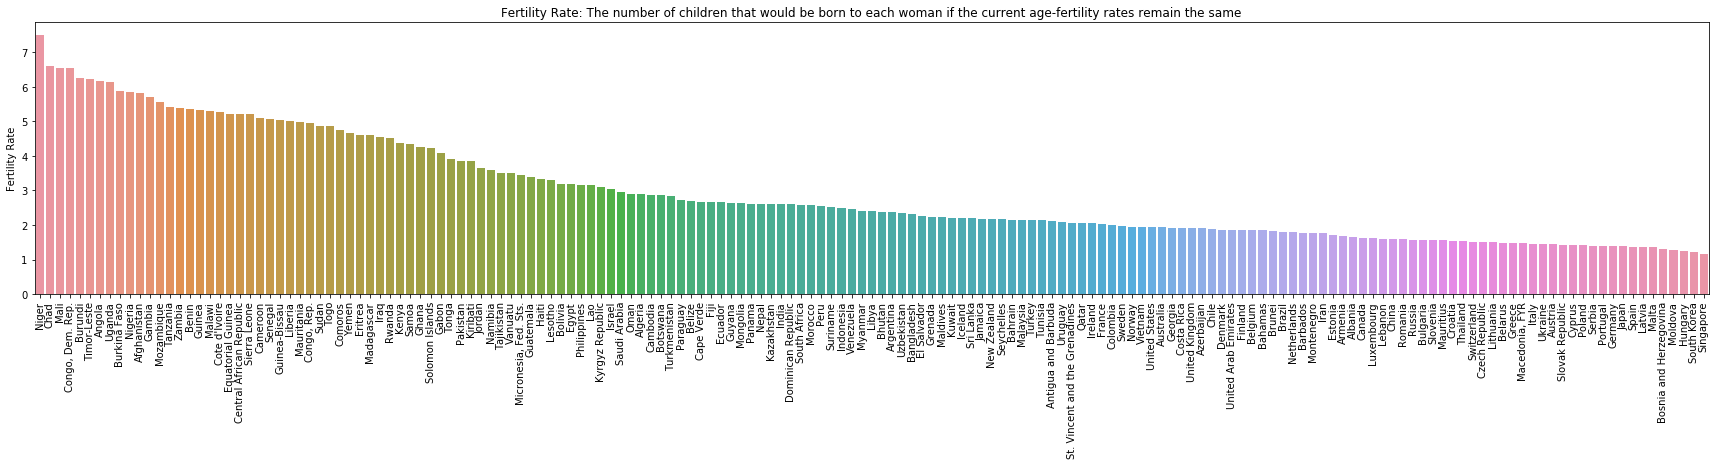

In [1979]:
# Fertility Rate: The number of children that would be born to each woman if the current age-fertility rates remain the same
plt.figure(figsize = (30,5))
total_fer = country_df[['country','total_fer']].sort_values('total_fer', ascending = False)
ax = sns.barplot(x='country', y='total_fer', data= total_fer)
ax.set(xlabel = '', ylabel= 'Fertility Rate')
ax.set_title("Fertility Rate: The number of children that would be born to each woman if the current age-fertility rates remain the same")
plt.xticks(rotation=90)
plt.show()


Above graph shows the fertility rate distribution

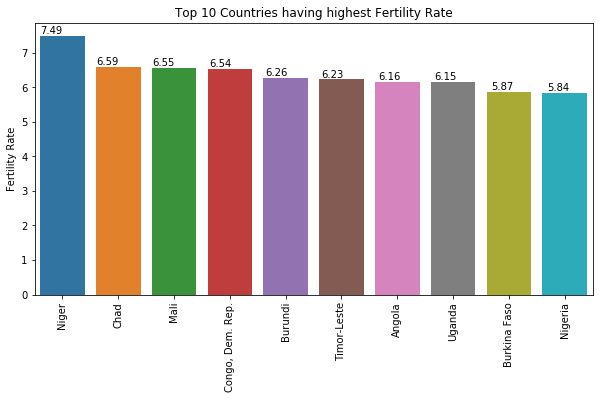

In [1980]:
#Top 10 Countries having highest Fertility Rate 
plt.figure(figsize = (10,5))
total_fer_top10 = country_df[['country','total_fer']].sort_values('total_fer', ascending = False).head(10)
ax = sns.barplot(x='country', y='total_fer', data= total_fer_top10)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
ax.set(xlabel = '', ylabel= 'Fertility Rate')
ax.set_title("Top 10 Countries having highest Fertility Rate")
plt.xticks(rotation=90)
plt.show()


Countries with high fertility rates are usaully seen to be poorer

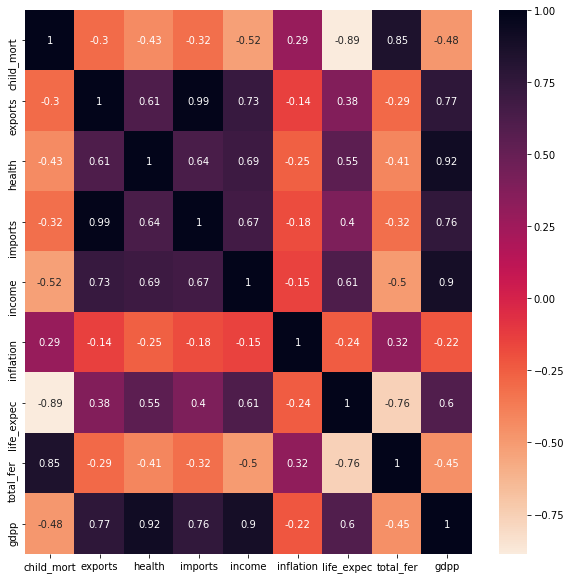

In [1981]:
# Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (10, 10))
sns.heatmap(country_df.corr(), annot = True, cmap="rocket_r")
plt.savefig('Correlation')
plt.show()

1)There is a very high correlation between child_mortality and life_expentency with correlation of -0.89

2)There is a very high correlation between child_mortality and total_fertility with correlation of 0.85

3)Also, it can be observed that imports and exports are highly correlated with correlation of 0.99

4)life_expentency and total_fertility are highly correlated with correlation of -0.76


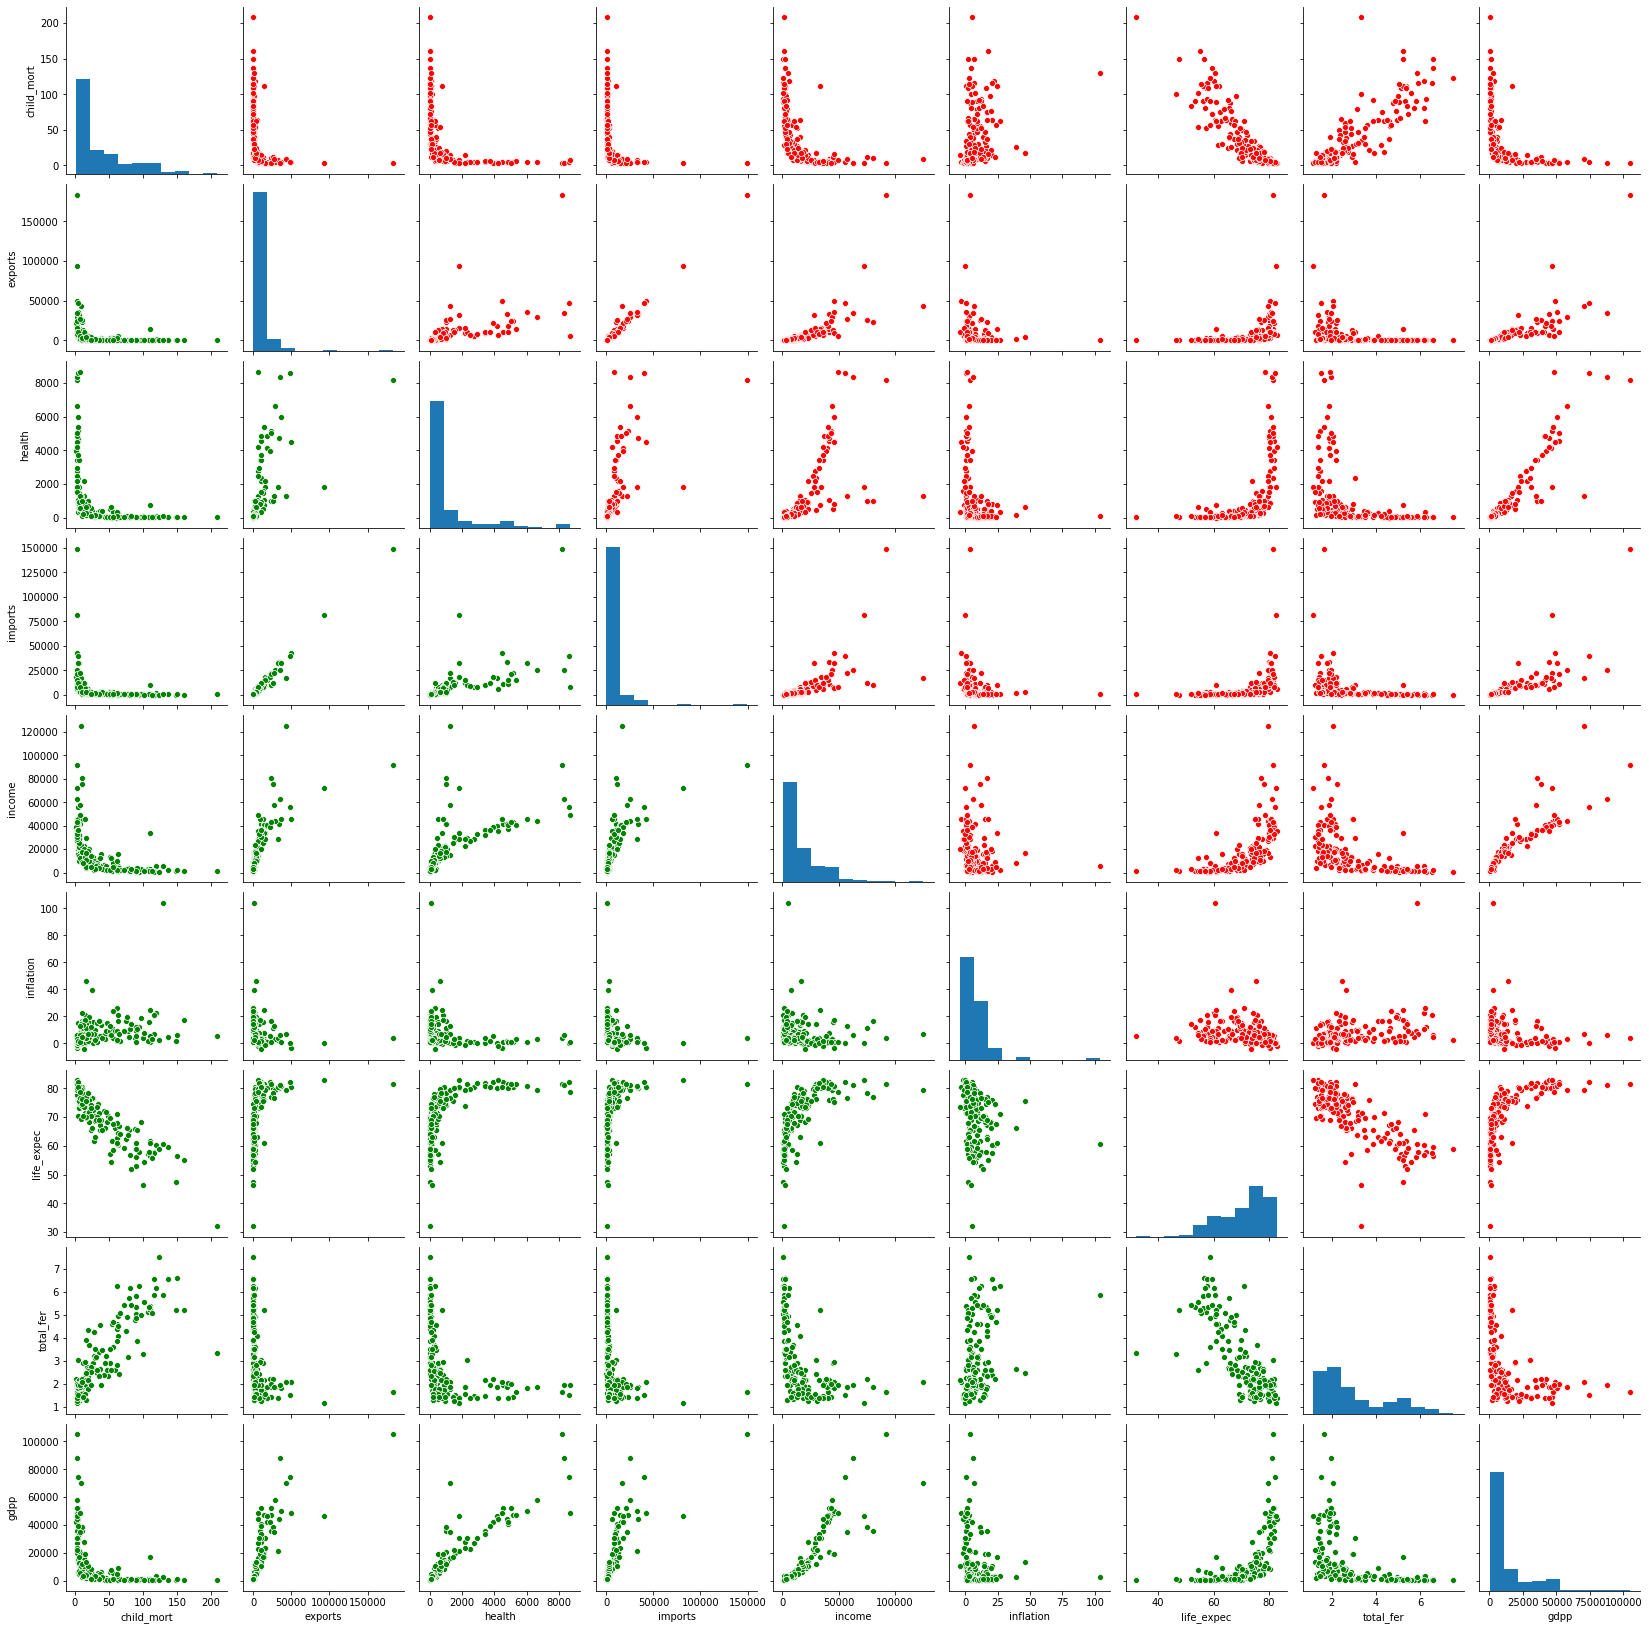

In [1982]:
g = sns.PairGrid(country_df)
g.map_upper(sns.scatterplot,color='red')
g.map_lower(sns.scatterplot, color='green')
g.map_diag(plt.hist)
plt.show()

## Outlier Analysis

In [1983]:

country_df.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,7420.618847,1056.733204,6588.352108,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,17973.885795,1801.408906,14710.810418,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,1.076920,12.821200,0.651092,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,447.140000,78.535500,640.215000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,1777.440000,321.886000,2045.580000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,7278.000000,976.940000,7719.600000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,183750.000000,8663.600000,149100.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


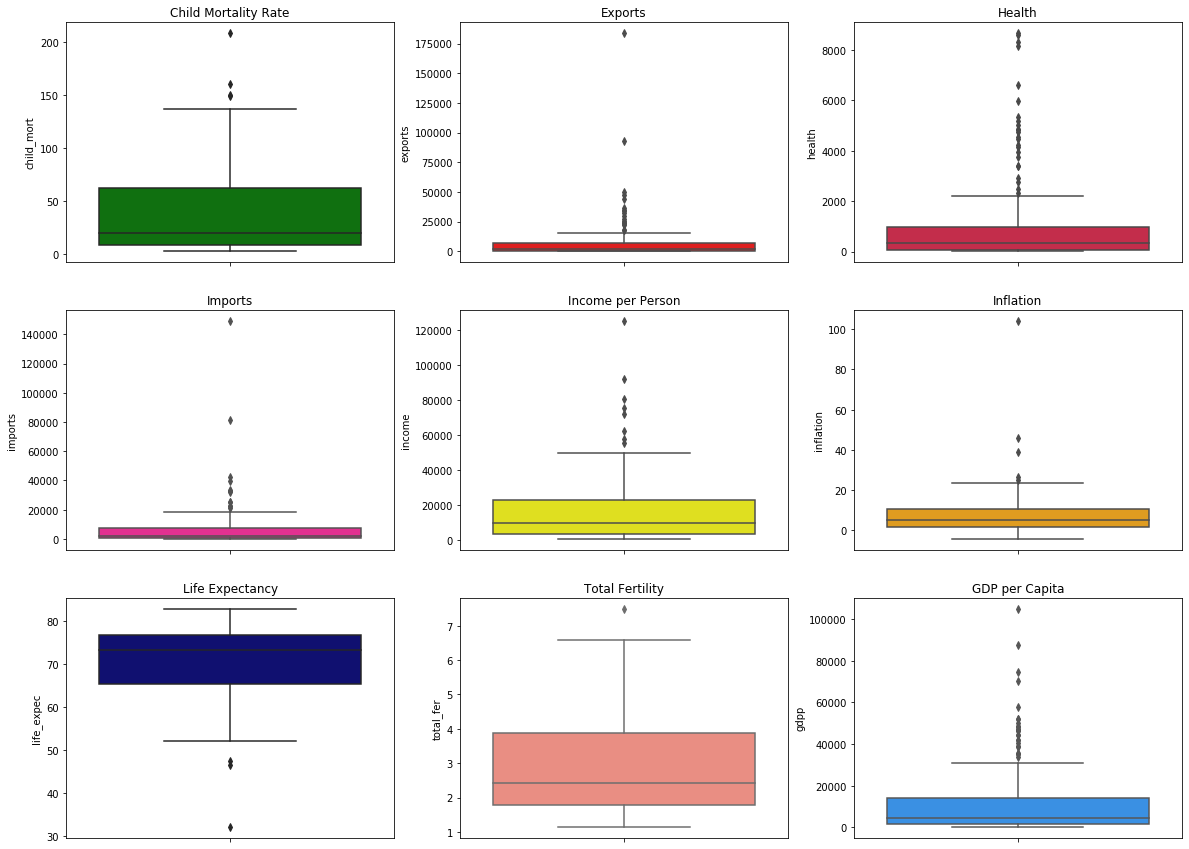

In [1984]:
f, axes = plt.subplots(3, 3, figsize=(20, 15))
s=sns.boxplot(y=country_df.child_mort,ax=axes[0, 0], color = 'g')
axes[0, 0].set_title('Child Mortality Rate')
s=sns.boxplot(y=country_df.exports,ax=axes[0, 1], color = 'r')
axes[0, 1].set_title('Exports')
s=sns.boxplot(y=country_df.health,ax=axes[0, 2],color = 'crimson')
axes[0, 2].set_title('Health')

s=sns.boxplot(y=country_df.imports,ax=axes[1, 0],color = 'deeppink')
axes[1, 0].set_title('Imports')
s=sns.boxplot(y=country_df.income,ax=axes[1, 1],color = 'yellow')
axes[1, 1].set_title('Income per Person')
s=sns.boxplot(y=country_df.inflation,ax=axes[1, 2],color = 'orange')
axes[1, 2].set_title('Inflation')

s=sns.boxplot(y=country_df.life_expec,ax=axes[2, 0], color = 'navy')
axes[2, 0].set_title('Life Expectancy')
s=sns.boxplot(y=country_df.total_fer,ax=axes[2, 1],color = 'salmon')
axes[2, 1].set_title('Total Fertility')
s=sns.boxplot(y=country_df.gdpp,ax=axes[2, 2],color = 'dodgerblue')
axes[2, 2].set_title('GDP per Capita')
s.get_figure().savefig('boxplot subplots.png')
plt.show()

Following are the observations from the above boxplots

- All the features have some outliers
- Total fertility and life expectancy have less outliers
- features like GDP, Income , Exports, Health have more outliers

Since we have only 167 countries and removing the outliers would actually remove some countries from the dataset.

Doing this might hamper the result we get as we might actually remove the countires which are in dire need of help. But it is equally important to treat these outliers so we will cap the values of the outliers as following




In [1985]:
Q1 = country_df.inflation.quantile(0.01)
country_df['inflation'][country_df['inflation']<=Q1]=Q1
Q3 = country_df.inflation.quantile(0.99)
country_df['inflation'][country_df['inflation']>=Q3]=Q3

In [1986]:
Q1 = country_df.child_mort.quantile(0.01)
country_df['child_mort'][country_df['child_mort']<=Q1]=Q1
Q3 = country_df.child_mort.quantile(0.99)
country_df['child_mort'][country_df['child_mort']>=Q3]=Q3

In [1987]:
Q1 = country_df.total_fer.quantile(0.01)
country_df['total_fer'][country_df['total_fer']<=Q1]=Q1
Q3 = country_df.total_fer.quantile(0.99)
country_df['total_fer'][country_df['total_fer']>=Q3]=Q3

In [1988]:
Q1 = country_df.exports.quantile(0.01)
country_df['exports'][country_df['exports']<=Q1]=Q1
Q3 = country_df.exports.quantile(0.99)
country_df['exports'][country_df['exports']>=Q3]=Q3

In [1989]:
Q1 = country_df.imports.quantile(0.01)
country_df['imports'][country_df['imports']<=Q1]=Q1
Q3 = country_df.imports.quantile(0.99)
country_df['imports'][country_df['imports']>=Q3]=Q3

In [1990]:
Q1 = country_df.health.quantile(0.01)
country_df['health'][country_df['health']<=Q1]=Q1
Q3 = country_df.health.quantile(0.99)
country_df['health'][country_df['health']>=Q3]=Q3

In [1991]:
Q1 = country_df.income.quantile(0.01)
country_df['income'][country_df['income']<=Q1]=Q1
Q3 = country_df.income.quantile(0.99)
country_df['income'][country_df['income']>=Q3]=Q3

In [1992]:
Q1 = country_df.life_expec.quantile(0.01)
country_df['life_expec'][country_df['life_expec']<=Q1]=Q1
Q3 = country_df.life_expec.quantile(0.99)
country_df['life_expec'][country_df['life_expec']>=Q3]=Q3

In [1993]:
Q1 = country_df.gdpp.quantile(0.01)
country_df['gdpp'][country_df['gdpp']<=Q1]=Q1
Q3 = country_df.gdpp.quantile(0.99)
country_df['gdpp'][country_df['gdpp']>=Q3]=Q3

In [1994]:
# lets look at the data statistic after removing outliers

country_df.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,37.904790,6538.351334,1054.240319,5873.845499,16858.601677,7.397332,70.645269,2.942896,12757.456527
std,39.026793,11415.230052,1790.825675,9422.259867,17956.060832,7.770993,8.553975,1.497595,17429.755235
min,2.800000,22.243716,17.009362,104.909640,742.240000,-2.348800,47.160000,1.243200,331.620000
25%,8.250000,447.140000,78.535500,640.215000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,1777.440000,321.886000,2045.580000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,7278.000000,976.940000,7719.600000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,153.400000,64794.260000,8410.330400,55371.390000,84374.000000,41.478000,82.370000,6.563600,79088.000000


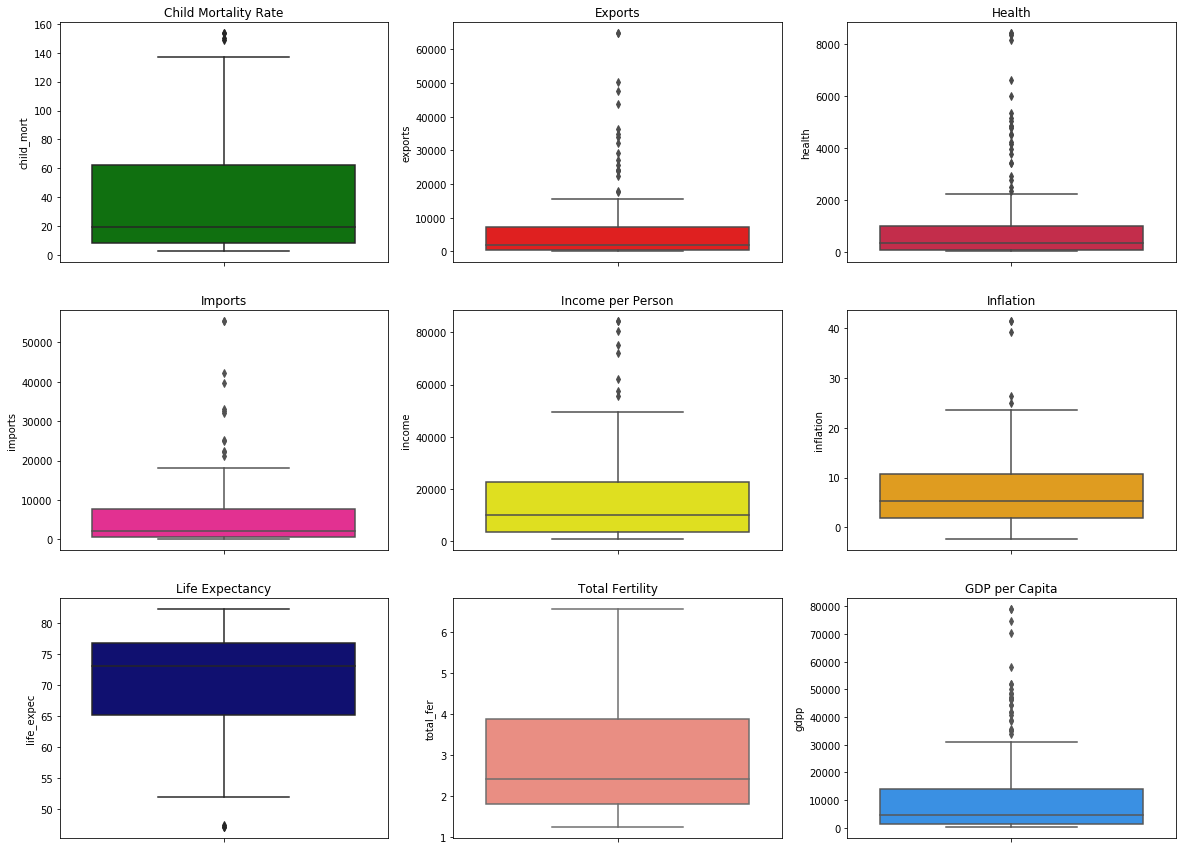

In [1995]:
f, axes = plt.subplots(3, 3, figsize=(20, 15))
s=sns.boxplot(y=country_df.child_mort,ax=axes[0, 0], color = 'g')
axes[0, 0].set_title('Child Mortality Rate')
s=sns.boxplot(y=country_df.exports,ax=axes[0, 1], color = 'r')
axes[0, 1].set_title('Exports')
s=sns.boxplot(y=country_df.health,ax=axes[0, 2],color = 'crimson')
axes[0, 2].set_title('Health')

s=sns.boxplot(y=country_df.imports,ax=axes[1, 0],color = 'deeppink')
axes[1, 0].set_title('Imports')
s=sns.boxplot(y=country_df.income,ax=axes[1, 1],color = 'yellow')
axes[1, 1].set_title('Income per Person')
s=sns.boxplot(y=country_df.inflation,ax=axes[1, 2],color = 'orange')
axes[1, 2].set_title('Inflation')

s=sns.boxplot(y=country_df.life_expec,ax=axes[2, 0], color = 'navy')
axes[2, 0].set_title('Life Expectancy')
s=sns.boxplot(y=country_df.total_fer,ax=axes[2, 1],color = 'salmon')
axes[2, 1].set_title('Total Fertility')
s=sns.boxplot(y=country_df.gdpp,ax=axes[2, 2],color = 'dodgerblue')
axes[2, 2].set_title('GDP per Capita')
s.get_figure().savefig('boxplot subplots.png')
plt.show()

In [1996]:
# lets drop the country column and make a copy of the data frame , as we will not be needing this country column in our further analysis

country_drop = country_df.copy()
country = country_drop.pop('country')


In [1997]:
country_drop.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,90.2,55.30,41.9174,248.297,1610.0,9.44,56.2,5.82,553.0
1,16.6,1145.20,267.8950,1987.740,9930.0,4.49,76.3,1.65,4090.0
2,27.3,1712.64,185.9820,1400.440,12900.0,16.10,76.5,2.89,4460.0
3,119.0,2199.19,100.6050,1514.370,5900.0,22.40,60.1,6.16,3530.0
4,10.3,5551.00,735.6600,7185.800,19100.0,1.44,76.8,2.13,12200.0


# Hopkins Statistics Test

The Hopkins statistics Test is a way of measuring the clustering tendency of a data set.
It is a statistical hypothesis test where the null hypothesis is that the data is generated by a Poisson point process and are thus uniformly randomly distributed.
A value close to 1 tends to indicate the data is highly clustered, random data will tend to result in values around 0.5, and uniformly distributed data will tend to result in values close to 0.

•	If the value is between {0.01, ...,0.3}, the data is regularly spaced.

•	If the value is around 0.5, it is random.

•	If the value is between {0.7, ..., 0.99}, it has a high tendency to cluster.

In [1998]:
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [1999]:
# How different our date is from the randomly scattered data?

Hopkins_score=round(hopkins(country_df.drop('country',axis= 1)),2)
Hopkins_score

0.86

In [2000]:
print("{} is a good Hopkins score for Clustering.".format(Hopkins_score))

0.86 is a good Hopkins score for Clustering.


# Scaling


There are two types of Scaling -

1) Min-Max scaling
2) Standardisation

Here we will use Standardization scaling

In [2001]:
# Standarisation technique for scaling
scaler = StandardScaler()
country_scaled = scaler.fit_transform(country_drop)

In [2002]:
country_scaled

array([[ 1.34401227, -0.56963804, -0.56698288, ..., -1.69379898,
         1.92692802, -0.70231404],
       [-0.54754345, -0.47387318, -0.44041711, ...,  0.66305283,
        -0.86591134, -0.49877488],
       [-0.27254826, -0.42401465, -0.48629503, ...,  0.68650409,
        -0.03542674, -0.47748297],
       ...,
       [-0.3753502 , -0.49162206, -0.54027452, ...,  0.28783264,
        -0.66498765, -0.65875194],
       [ 0.47276581, -0.53996578, -0.55245405, ..., -0.36880269,
         1.15672052, -0.65875194],
       [ 1.16153882, -0.52703195, -0.54229642, ..., -2.18627548,
         1.64563484, -0.65012008]])

In [2003]:
country_df1 = pd.DataFrame(country_scaled, columns = ['child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp'])
country_df1.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.344012,-0.569638,-0.566983,-0.598844,-0.851772,0.263649,-1.693799,1.926928,-0.702314
1,-0.547543,-0.473873,-0.440417,-0.413679,-0.387025,-0.375251,0.663053,-0.865911,-0.498775
2,-0.272548,-0.424015,-0.486295,-0.476198,-0.221124,1.123260,0.686504,-0.035427,-0.477483
3,2.084186,-0.381264,-0.534113,-0.464070,-0.612136,1.936405,-1.236499,2.154642,-0.531000
4,-0.709457,-0.086754,-0.178431,0.139659,0.125202,-0.768917,0.721681,-0.544433,-0.032079


# Model Building

## K-means Clustering

K-means clustering is one of the simplest and popular unsupervised machine learning algorithms.

The algorithm works as follows:

- we start with randomly initialize k points called means
- We categorize each item to its closest mean and we update the mean’s coordinates, which are the averages of the items categorized in that mean so far
- We repeat the process for a given number of iterations and at the end, we have our clusters.

lets find the optimal Number of clusters 

There are two methods of finding optiomal clusters

1) Elbow curve  2) Silhouette Analysis

### Elbow Curve

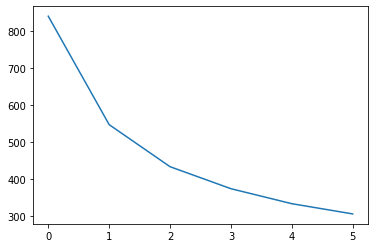

In [2004]:
# Elbow curve method to find the ideal number of clusters.
ssd = []
for num_clusters in list(range(2,8)):
    model_clus = KMeans(n_clusters = num_clusters, max_iter=150,random_state= 50)
    model_clus.fit(country_df1)
    ssd.append(model_clus.inertia_)

plt.plot(ssd);

The best number of clusters from the above graph can be deduced as 3.

### Silhouette Analysis

for the Silhouette Analysis, The silhouette score is calculated using the formula

(p−q)/max(p,q)

where 
 
**p**  is the mean distance to the points in the nearest cluster that the data point is not a part of

**q**  is the mean intra-cluster distance to all the points in its own cluster.

Also, we know that the value of the silhouette score range lies between -1 to 1.

Where a score closer to 1 indicates that the data point is very similar to other data points in the cluster,

Where a score closer to -1 indicates that the data point is not similar to the data points in its cluster.


In [2005]:
# Silhouette score analysis to find the ideal number of clusters for K-means clustering

range_n_clusters = [2, 3, 4, 5, 6, 7, 8]

for num_clusters in range_n_clusters:
    
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50,random_state= 100)
    kmeans.fit(country_df1)
    
    cluster_labels = kmeans.labels_
    
    # silhouette score
    silhouette_avg = silhouette_score(country_df1, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))

For n_clusters=2, the silhouette score is 0.46939980287788113
For n_clusters=3, the silhouette score is 0.40708993455880516
For n_clusters=4, the silhouette score is 0.39450005846699704
For n_clusters=5, the silhouette score is 0.3864288935632213
For n_clusters=6, the silhouette score is 0.2993917673922566
For n_clusters=7, the silhouette score is 0.28829833259133036
For n_clusters=8, the silhouette score is 0.3214567013198668


# Performing K - means Analysis

### with k = 3

In [2006]:
kmeans = KMeans(n_clusters= 3,max_iter=50,random_state= 100)
kmeans.fit(df_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=50,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=100, tol=0.0001, verbose=0)

In [2007]:
kmeans.labels_

array([2, 0, 0, 2, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 2, 0, 0, 0, 0,
       0, 1, 0, 2, 2, 0, 2, 1, 0, 2, 2, 0, 0, 0, 2, 2, 2, 0, 2, 0, 1, 0,
       1, 0, 0, 0, 0, 2, 2, 0, 0, 1, 1, 2, 2, 0, 1, 2, 1, 0, 0, 2, 2, 0,
       2, 0, 1, 2, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 2, 2, 1, 0, 2, 0, 0, 2,
       2, 0, 0, 1, 0, 2, 2, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0,
       1, 1, 2, 2, 1, 1, 2, 0, 0, 0, 0, 0, 0, 1, 0, 0, 2, 0, 1, 2, 0, 0,
       2, 1, 0, 0, 0, 0, 0, 1, 0, 0, 2, 0, 1, 1, 2, 2, 0, 2, 2, 0, 0, 0,
       2, 2, 0, 1, 1, 1, 0, 0, 0, 0, 0, 2, 2])

In [2008]:
# Assign the label

country_df['Cluster_Id'] = kmeans.labels_
country_df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Cluster_Id
0,Afghanistan,90.2,55.30,41.9174,248.297,1610.0,9.44,56.2,5.82,553.0,2
1,Albania,16.6,1145.20,267.8950,1987.740,9930.0,4.49,76.3,1.65,4090.0,0
2,Algeria,27.3,1712.64,185.9820,1400.440,12900.0,16.10,76.5,2.89,4460.0,0
3,Angola,119.0,2199.19,100.6050,1514.370,5900.0,22.40,60.1,6.16,3530.0,2
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100.0,1.44,76.8,2.13,12200.0,0


In [2009]:
## Number of countries in each cluster
country_df.Cluster_Id.value_counts(ascending=True)

1    32
2    47
0    88
Name: Cluster_Id, dtype: int64

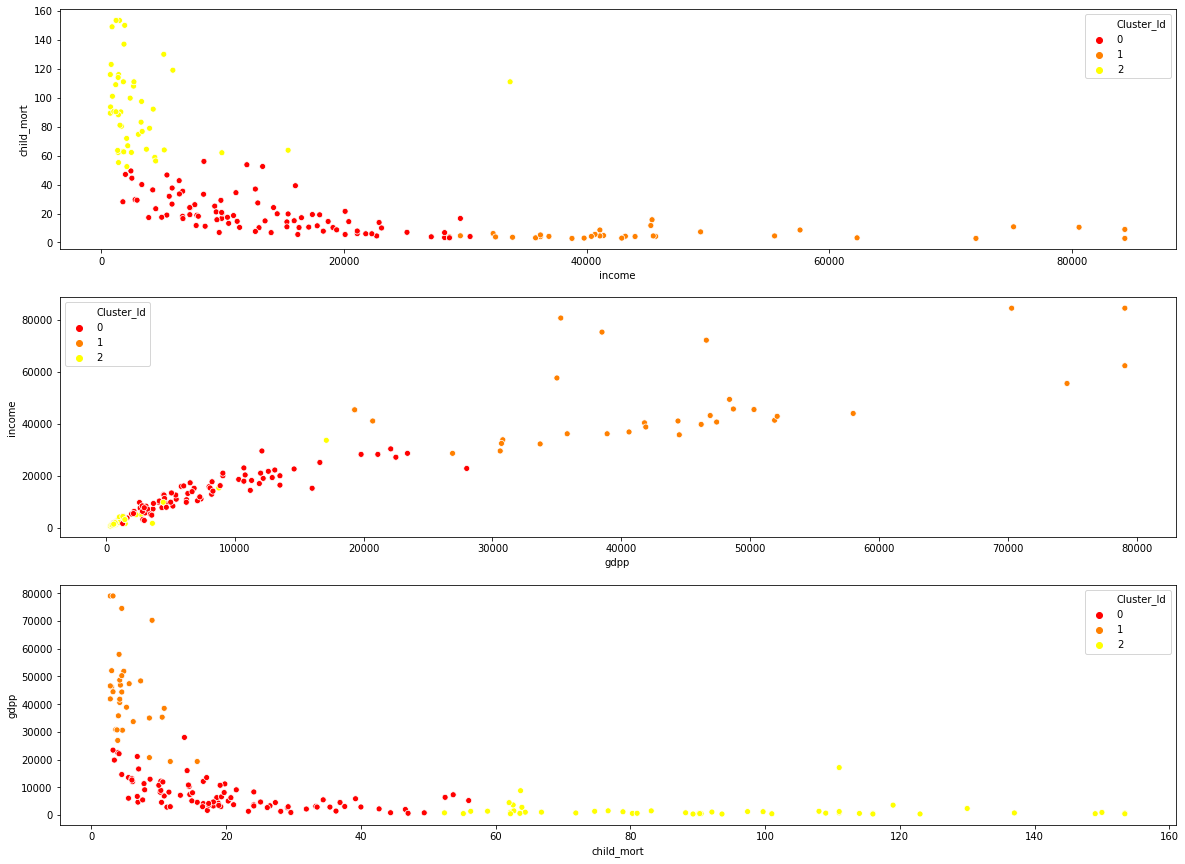

In [2010]:
# Scatter plot on Original attributes to visualize the spread of the data

plt.figure(figsize = (20,15))
plt.subplot(3,1,1)
sns.scatterplot(x = 'income', y = 'child_mort',hue='Cluster_Id',data = country_df,legend='full',palette="autumn")
plt.subplot(3,1,2)
sns.scatterplot(x = 'gdpp', y = 'income',hue='Cluster_Id', data = country_df,legend='full',palette="autumn")
plt.subplot(3,1,3)
sns.scatterplot(x = 'child_mort', y = 'gdpp',hue='Cluster_Id', data=country_df,legend='full',palette="autumn")
plt.show()

In [2011]:
country_df[['gdpp','income','child_mort','Cluster_Id']].groupby('Cluster_Id').mean()

,gdpp,income,child_mort
Cluster_Id,,,
0,7358.704545,12924.431818,20.504545
1,44008.625000,47464.000000,5.600000
2,1588.366809,3386.988936,92.478723


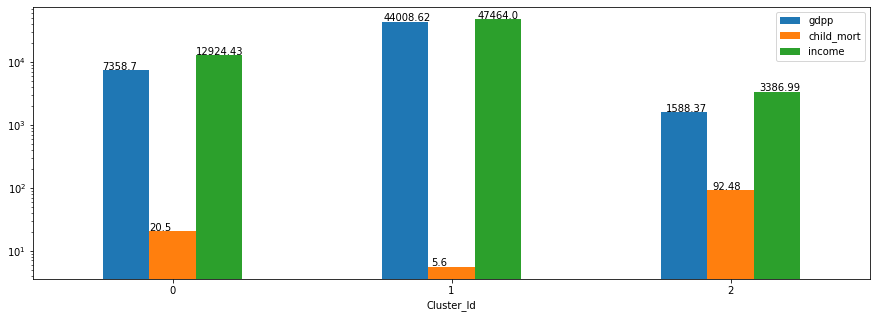

In [2012]:
ax=country_df[['gdpp','child_mort','income','Cluster_Id']].groupby('Cluster_Id').mean().plot(kind = 'bar',figsize = (15,5))

for p in ax.patches:
    ax.annotate(str(round(p.get_height(),2)), (p.get_x() * 1.01 , p.get_height() * 1.01))
plt.yscale('log')
plt.xticks(rotation=0)
plt.show();

### with k = 4

In [2013]:
kmeans = KMeans(n_clusters = 4, max_iter = 50,random_state= 100)
kmeans.fit(df_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=50,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=100, tol=0.0001, verbose=0)

In [2014]:
kmeans.labels_

array([2, 0, 0, 2, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 2, 0, 0, 0, 0,
       0, 3, 0, 2, 2, 0, 2, 1, 0, 2, 2, 0, 0, 0, 2, 2, 2, 0, 2, 0, 1, 1,
       1, 0, 0, 0, 0, 2, 2, 0, 0, 1, 1, 0, 2, 0, 1, 2, 1, 0, 0, 2, 2, 0,
       2, 0, 1, 2, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 2, 2, 3, 0, 2, 0, 0, 2,
       2, 0, 0, 3, 0, 2, 2, 0, 0, 2, 1, 2, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0,
       1, 1, 2, 2, 3, 1, 2, 0, 0, 0, 0, 0, 1, 3, 0, 0, 2, 0, 1, 2, 0, 0,
       2, 3, 0, 1, 0, 0, 1, 1, 0, 0, 2, 0, 1, 3, 0, 2, 0, 2, 2, 0, 0, 0,
       2, 2, 0, 1, 1, 1, 0, 0, 0, 0, 0, 2, 2])

In [2015]:
# Assign the label

country_df['Cluster_Id'] = kmeans.labels_
country_df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Cluster_Id
0,Afghanistan,90.2,55.30,41.9174,248.297,1610.0,9.44,56.2,5.82,553.0,2
1,Albania,16.6,1145.20,267.8950,1987.740,9930.0,4.49,76.3,1.65,4090.0,0
2,Algeria,27.3,1712.64,185.9820,1400.440,12900.0,16.10,76.5,2.89,4460.0,0
3,Angola,119.0,2199.19,100.6050,1514.370,5900.0,22.40,60.1,6.16,3530.0,2
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100.0,1.44,76.8,2.13,12200.0,0


In [2016]:
## Number of countries in each cluster
country_df.Cluster_Id.value_counts(ascending=True)

3     7
1    31
2    45
0    84
Name: Cluster_Id, dtype: int64

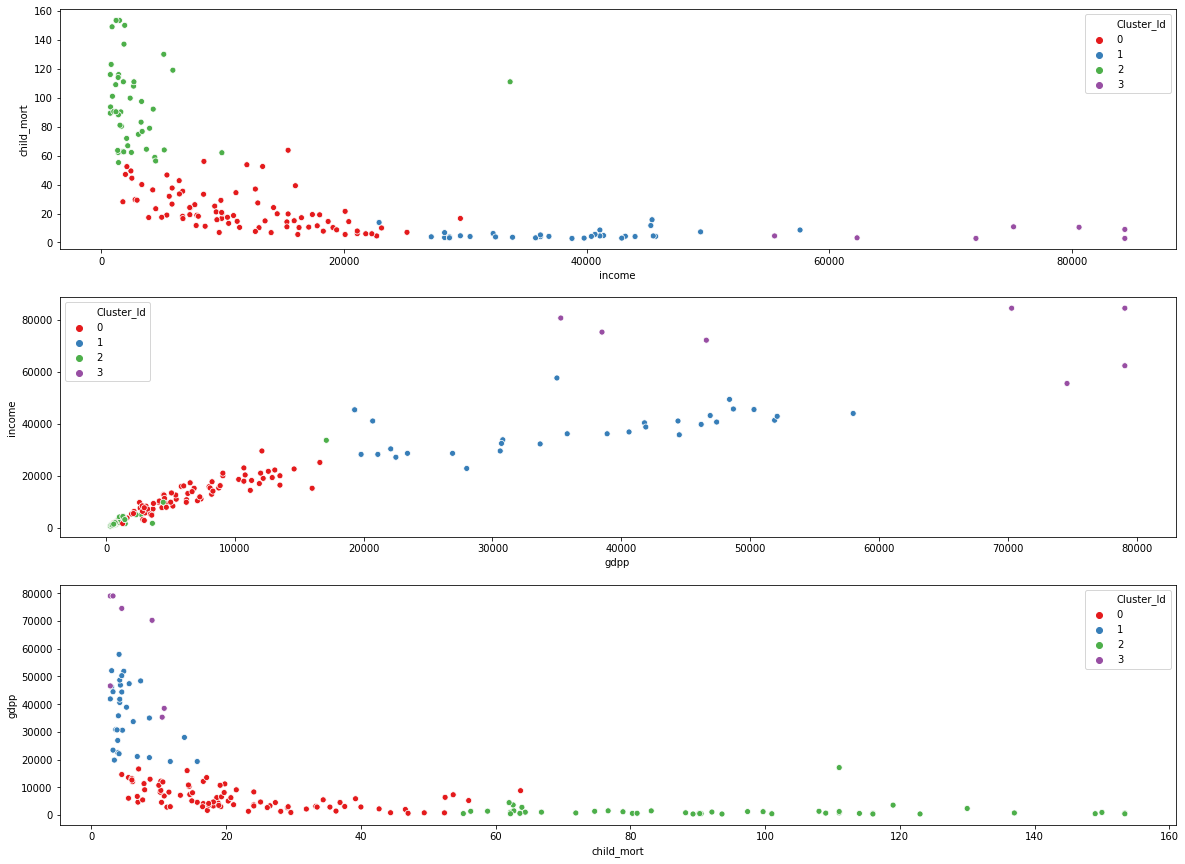

In [2017]:
# Scatter plot on Original attributes to visualize the spread of the data

plt.figure(figsize = (20,15))
plt.subplot(3,1,1)
sns.scatterplot(x = 'income', y = 'child_mort',hue='Cluster_Id',data = country_df,legend='full',palette="Set1")
plt.subplot(3,1,2)
sns.scatterplot(x = 'gdpp', y = 'income',hue='Cluster_Id', data = country_df,legend='full',palette="Set1")
plt.subplot(3,1,3)
sns.scatterplot(x = 'child_mort', y = 'gdpp',hue='Cluster_Id', data=country_df,legend='full',palette="Set1")
plt.show()

In [2018]:
country_df[['gdpp','income','child_mort','Cluster_Id']].groupby('Cluster_Id').mean()

,gdpp,income,child_mort
Cluster_Id,,,
0,6192.309524,11774.523810,22.444048
1,36183.870968,37748.387097,5.509677
2,1448.116444,3148.410667,94.008889
3,60496.571429,73492.571429,6.228571


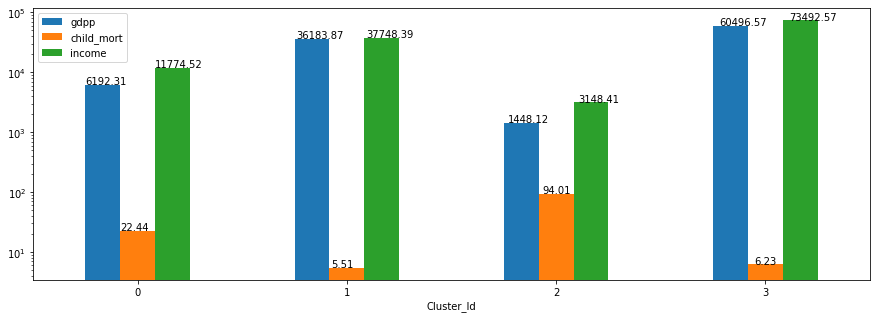

In [2019]:
ax=country_df[['gdpp','child_mort','income','Cluster_Id']].groupby('Cluster_Id').mean().plot(kind = 'bar',figsize = (15,5))

for p in ax.patches:
    ax.annotate(str(round(p.get_height(),2)), (p.get_x() * 1.01 , p.get_height() * 1.01))
plt.yscale('log')
plt.xticks(rotation=0)
plt.show();

#### from the above graph we can see that the inter-cluster distance between the cluster 1 and cluster 3 is less, hence we will process with only 3 clusters

In [2020]:
kmeans = KMeans(n_clusters = 3, max_iter = 50,random_state= 100)
kmeans.fit(df_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=50,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=100, tol=0.0001, verbose=0)

In [2021]:
# Assign the label

country_df['Cluster_Id'] = kmeans.labels_
country_df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Cluster_Id
0,Afghanistan,90.2,55.30,41.9174,248.297,1610.0,9.44,56.2,5.82,553.0,2
1,Albania,16.6,1145.20,267.8950,1987.740,9930.0,4.49,76.3,1.65,4090.0,0
2,Algeria,27.3,1712.64,185.9820,1400.440,12900.0,16.10,76.5,2.89,4460.0,0
3,Angola,119.0,2199.19,100.6050,1514.370,5900.0,22.40,60.1,6.16,3530.0,2
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100.0,1.44,76.8,2.13,12200.0,0


In [2022]:
country_df['Cluster_Id'].value_counts()

0    88
2    47
1    32
Name: Cluster_Id, dtype: int64

In [2023]:
country_df[country_df['Cluster_Id']==2].sort_values(by = ['child_mort','income','gdpp',], ascending = [False, True, True]).head()
# They are Developing countries as per UN & IMF

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Cluster_Id
132,Sierra Leone,153.4,67.032,52.2690,137.655,1220.0,17.20,55.00,5.2000,399.0,2
66,Haiti,153.4,101.286,45.7442,428.314,1500.0,5.45,47.16,3.3300,662.0,2
32,Chad,150.0,330.096,40.6341,390.195,1930.0,6.39,56.50,6.5636,897.0,2
31,Central African Republic,149.0,52.628,17.7508,118.190,888.0,2.01,47.50,5.2100,446.0,2
97,Mali,137.0,161.424,35.2584,248.508,1870.0,4.37,59.50,6.5500,708.0,2


In [2024]:
country_df[country_df['Cluster_Id']==1].sort_values(by = ['child_mort','income','gdpp',], ascending = [False, True, True]).head()

# They are develped countries as per UN & IMF

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Cluster_Id
128,Saudi Arabia,15.7,9572.8,827.97,6369.0,45400.0,17.20,75.1,2.96,19300.0,1
115,Oman,11.7,12680.1,534.61,7951.6,45300.0,15.60,76.1,2.90,19300.0,1
82,Kuwait,10.8,25679.5,1012.55,11704.0,75200.0,11.20,78.2,2.21,38500.0,1
23,Brunei,10.5,23792.2,1002.52,9884.0,80600.0,16.70,77.1,1.84,35300.0,1
123,Qatar,9.0,43796.9,1272.43,16731.4,84374.0,6.98,79.5,2.07,70300.0,1


In [2025]:
country_df[country_df['Cluster_Id']==0].sort_values(by = ['child_mort','income','gdpp',], ascending = [False, True, True]).head()
# They are least Developed countries as per UN & IMF



,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Cluster_Id
108,Namibia,56.0,2480.8200,351.8820,3150.330,8460.0,3.56,58.6,3.60,5190.0,0
137,South Africa,53.7,2082.0800,650.8320,1994.720,12000.0,6.35,54.3,2.59,7280.0,0
21,Botswana,52.5,2768.6000,527.0500,3257.550,13300.0,8.92,57.1,2.88,6350.0,0
12,Bangladesh,49.4,121.2800,26.6816,165.244,2440.0,7.14,70.4,2.33,758.0,0
109,Nepal,47.0,56.7136,31.0800,215.488,1990.0,15.10,68.3,2.61,592.0,0


# Final List of countries which are in need of the aid based on socio-economic factors.

In [2026]:
FinalListbyKMean=country_df[country_df['Cluster_Id']==2].sort_values(by = ['child_mort','income','gdpp',], ascending = [False, True, True])[:10]
FinalListbyKMean['country']
FinalListbyKMean.reset_index(drop=True).country[:10]

0                Sierra Leone
1                       Haiti
2                        Chad
3    Central African Republic
4                        Mali
5                     Nigeria
6                       Niger
7                      Angola
8            Congo, Dem. Rep.
9                Burkina Faso
Name: country, dtype: object

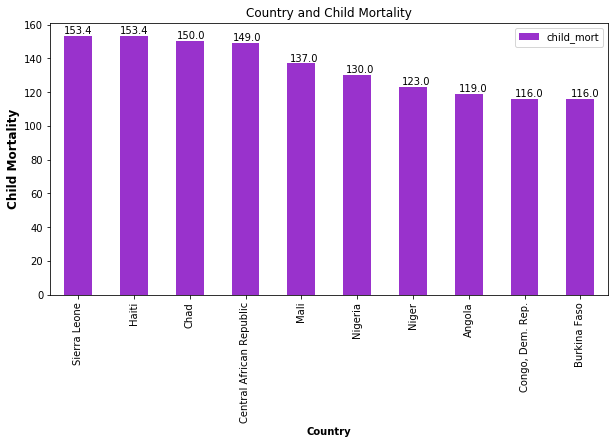

In [2027]:
# BarPlot for Child Mortality of countries which are in need of aid
df_list_cm = pd.DataFrame(FinalListbyKMean.groupby(['country'])['child_mort'].mean().sort_values(ascending = False))
ax=df_list_cm.plot(kind = 'bar',figsize = (10,5),color = 'darkorchid')
for p in ax.patches:
    ax.annotate(str(round(p.get_height(),2)), (p.get_x() * 1.01 , p.get_height() * 1.01))
plt.title('Country and Child Mortality')
plt.xlabel("Country",fontweight = 'bold')
plt.ylabel("Child Mortality", fontsize = 12, fontweight = 'bold')
plt.show()

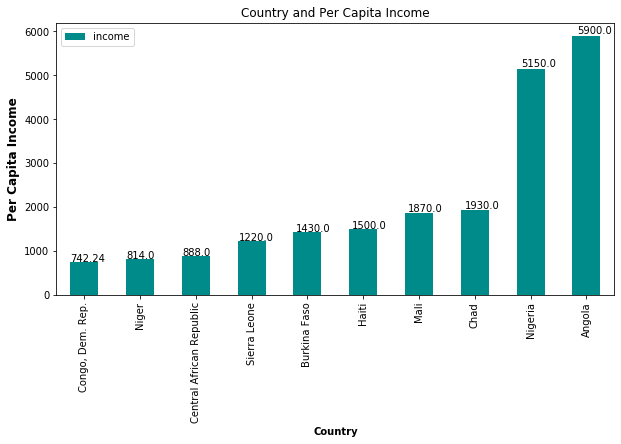

In [2028]:
# BarPlot for Per Capita Income of countries which are in need of aid

df_list_in = pd.DataFrame(FinalListbyKMean.groupby(['country'])['income'].mean().sort_values(ascending = True))
ax=df_list_in.plot(kind = 'bar',figsize = (10,5),color= 'darkcyan')
for p in ax.patches:
    ax.annotate(str(round(p.get_height(),2)), (p.get_x() * 1.01 , p.get_height() * 1.01))
plt.title('Country and Per Capita Income')
plt.xlabel("Country",fontweight = 'bold')
plt.ylabel("Per Capita Income", fontsize = 12, fontweight = 'bold')
plt.show()

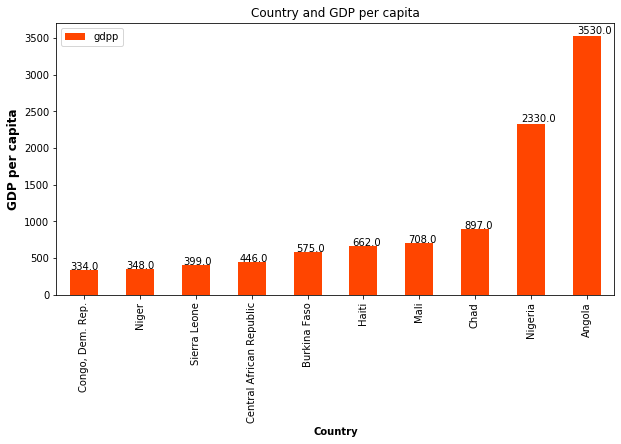

In [2029]:
# BarPlot for GDP of countries which are in need of aid

df_list_gdp =pd.DataFrame(FinalListbyKMean.groupby(['country'])['gdpp'].mean().sort_values(ascending = True))
ax=df_list_gdp.plot(kind = 'bar',figsize = (10,5),color = 'orangered')
for p in ax.patches:
    ax.annotate(str(round(p.get_height(),2)), (p.get_x() * 1.01 , p.get_height() * 1.01))

plt.title('Country and GDP per capita')
plt.xlabel("Country",fontweight = 'bold')
plt.ylabel("GDP per capita", fontsize = 12, fontweight = 'bold')
plt.show()

# Hierarchical Clustering

Hierarchical clustering is another type of clustering which involves creating clusters that have a predetermined ordering from top to bottom. 
There are two types of hierarchical clustering,

1) Divisive 2) Agglomerative.

In [2030]:
country_df1.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.344012,-0.569638,-0.566983,-0.598844,-0.851772,0.263649,-1.693799,1.926928,-0.702314
1,-0.547543,-0.473873,-0.440417,-0.413679,-0.387025,-0.375251,0.663053,-0.865911,-0.498775
2,-0.272548,-0.424015,-0.486295,-0.476198,-0.221124,1.123260,0.686504,-0.035427,-0.477483
3,2.084186,-0.381264,-0.534113,-0.464070,-0.612136,1.936405,-1.236499,2.154642,-0.531000
4,-0.709457,-0.086754,-0.178431,0.139659,0.125202,-0.768917,0.721681,-0.544433,-0.032079


### Single Linkage 

In this type of hierarchical clustering, the distance between two clusters is defined as the shortest distance between two points in each cluster. 


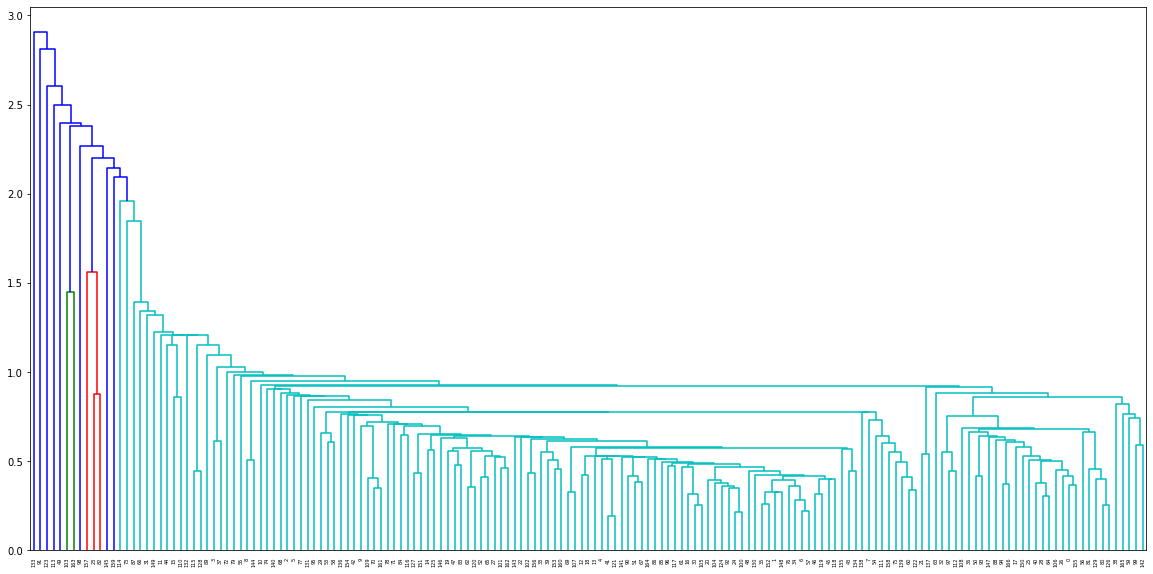

In [2031]:
# Single linkage
plt.figure(figsize = (20,10))
mergings = linkage(country_df1, method='single',metric='euclidean')
dendrogram(mergings)
plt.show()

### Complete Linkage 

In this type of clustering, the distance between two clusters is defined as the longest distance between two points in each cluster. 

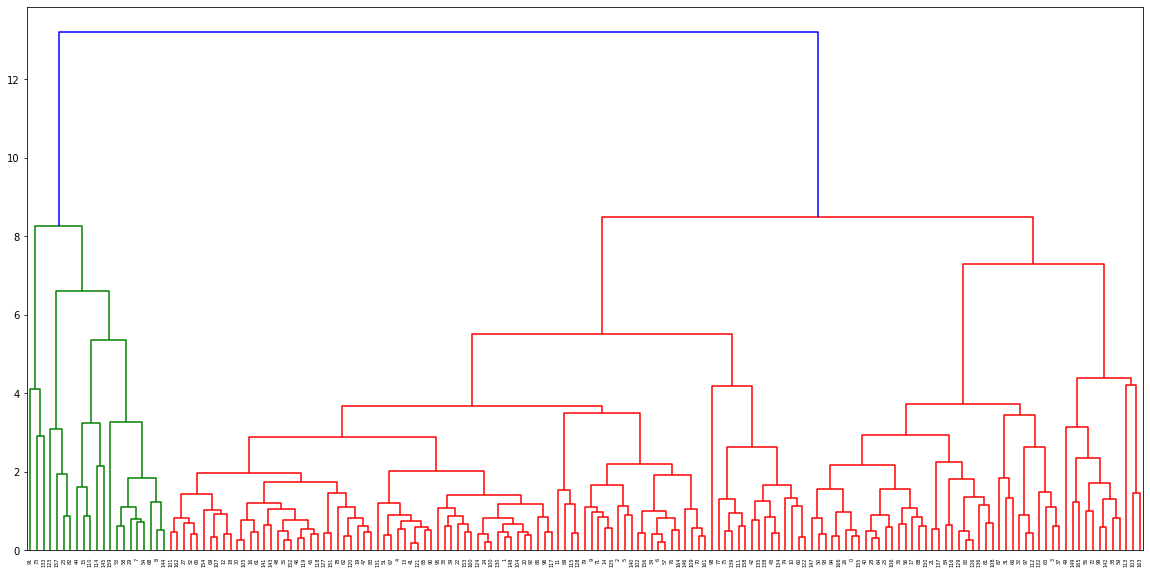

In [2032]:
# Complete linkage
plt.figure(figsize = (20,10))
mergings = linkage(country_df1, method='complete',metric='euclidean')
dendrogram(mergings)
plt.show()

In [2033]:
df_hc = country_df.copy()
df_hc = df_hc.drop('Cluster_Id',axis=1)
df_hc.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,55.30,41.9174,248.297,1610.0,9.44,56.2,5.82,553.0
1,Albania,16.6,1145.20,267.8950,1987.740,9930.0,4.49,76.3,1.65,4090.0
2,Algeria,27.3,1712.64,185.9820,1400.440,12900.0,16.10,76.5,2.89,4460.0
3,Angola,119.0,2199.19,100.6050,1514.370,5900.0,22.40,60.1,6.16,3530.0
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100.0,1.44,76.8,2.13,12200.0


We know that, world is majorly divided into 3 types for countries on the basis of scale of development.
1) Developed countries  2) Developing countries 3) Least developed countries

In [2034]:
# 3 clusters
cluster_labels = cut_tree(mergings, n_clusters=3).reshape(-1, )
cluster_labels

array([0, 1, 1, 0, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 2, 1, 0, 1, 1, 1, 0,
       1, 2, 1, 0, 0, 1, 0, 2, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       2, 1, 1, 1, 1, 0, 0, 1, 1, 2, 2, 0, 0, 1, 2, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 2, 1, 1, 1, 0, 2, 1, 1, 1, 1, 1, 1, 0, 0, 2, 1, 0, 1, 1, 0,
       0, 1, 1, 2, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1,
       2, 1, 0, 0, 2, 1, 0, 1, 1, 1, 1, 1, 1, 2, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 2, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 2, 2, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 2, 1, 2, 1, 1, 1, 0, 1, 0, 0])

In [2035]:
# assign cluster labels
df_hc['Cluster_labels'] = cluster_labels
df_hc.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Cluster_labels
0,Afghanistan,90.2,55.30,41.9174,248.297,1610.0,9.44,56.2,5.82,553.0,0
1,Albania,16.6,1145.20,267.8950,1987.740,9930.0,4.49,76.3,1.65,4090.0,1
2,Algeria,27.3,1712.64,185.9820,1400.440,12900.0,16.10,76.5,2.89,4460.0,1
3,Angola,119.0,2199.19,100.6050,1514.370,5900.0,22.40,60.1,6.16,3530.0,0
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100.0,1.44,76.8,2.13,12200.0,1


In [2036]:
## Number of countries in each cluster
df_hc.Cluster_labels.value_counts(ascending=True)

2    21
0    50
1    96
Name: Cluster_labels, dtype: int64

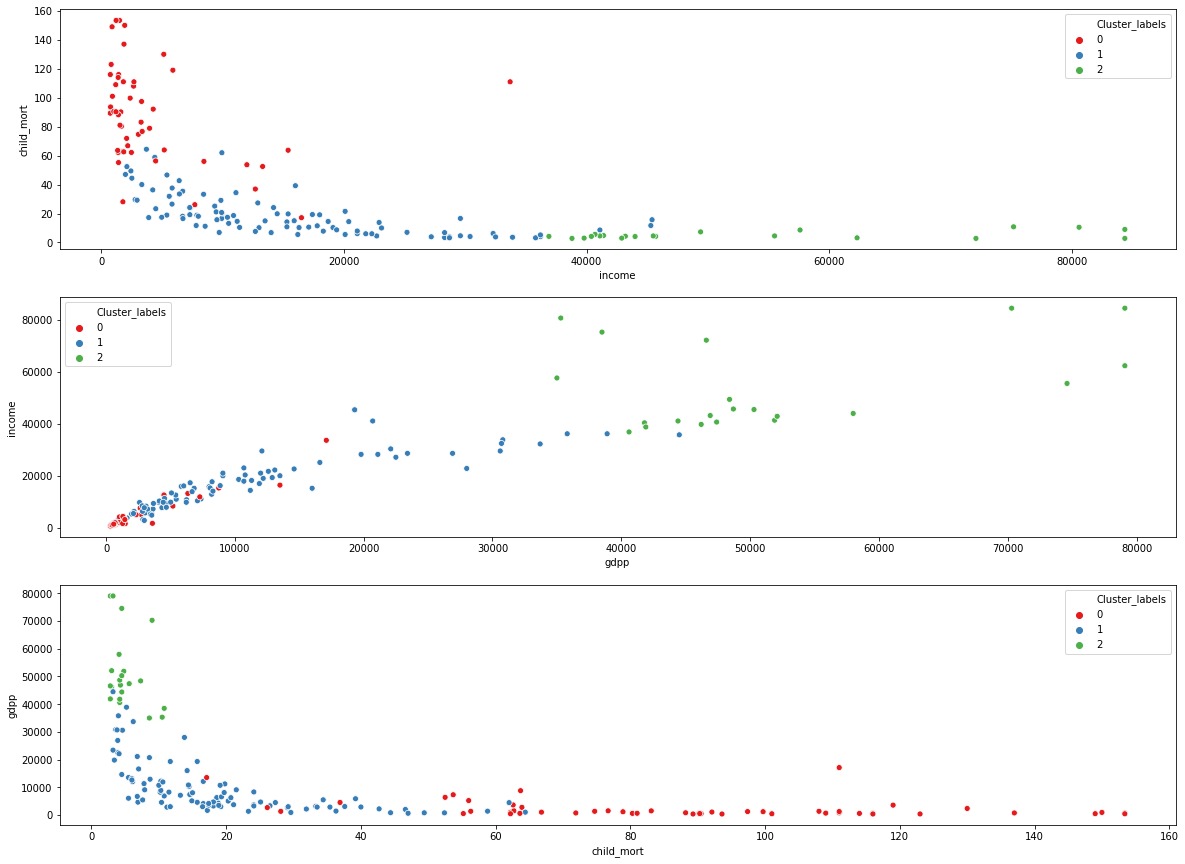

In [2037]:
# Scatter plot on Original attributes to visualize the spread of the data

plt.figure(figsize = (20,15))
plt.subplot(3,1,1)
sns.scatterplot(x = 'income', y = 'child_mort',hue='Cluster_labels',data = df_hc,legend='full',palette="Set1")
plt.subplot(3,1,2)
sns.scatterplot(x = 'gdpp', y = 'income',hue='Cluster_labels', data = df_hc,legend='full',palette="Set1")
plt.subplot(3,1,3)
sns.scatterplot(x = 'child_mort', y = 'gdpp',hue='Cluster_labels', data=df_hc,legend='full',palette="Set1")
plt.show()

In [2038]:
df_hc[['gdpp','income','child_mort','Cluster_labels']].groupby('Cluster_labels').mean()

,gdpp,income,child_mort
Cluster_labels,,,
0,2157.944800,4229.169600,87.586000
1,9849.187500,15438.333333,19.188542
2,51289.333333,53421.333333,5.176190


### Cluster profiling

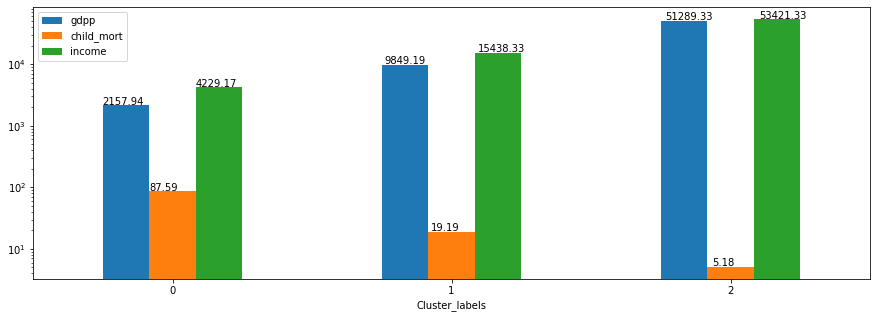

In [2039]:
ax=df_hc[['gdpp','child_mort','income','Cluster_labels']].groupby('Cluster_labels').mean().plot(kind = 'bar',figsize = (15,5))

for p in ax.patches:
    ax.annotate(str(round(p.get_height(),2)), (p.get_x() * 1.01 , p.get_height() * 1.01))
plt.yscale('log')
plt.xticks(rotation=0)
plt.show();

In [2040]:
df_hc[df_hc['Cluster_labels']==2].sort_values(by = ['child_mort','income','gdpp',], ascending = [False, True, True]).head()
# They are Developed countries as per UN & IMF

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Cluster_labels
82,Kuwait,10.8,25679.5,1012.5500,11704.0,75200.0,11.20,78.2,2.21,38500.0,2
23,Brunei,10.5,23792.2,1002.5200,9884.0,80600.0,16.70,77.1,1.84,35300.0,2
123,Qatar,9.0,43796.9,1272.4300,16731.4,84374.0,6.98,79.5,2.07,70300.0,2
157,United Arab Emirates,8.6,27195.0,1281.0000,22260.0,57600.0,12.50,76.5,1.87,35000.0,2
159,United States,7.3,6001.6,8410.3304,7647.2,49400.0,1.22,78.7,1.93,48400.0,2


In [2041]:
df_hc[df_hc['Cluster_labels']==0].sort_values(by = ['child_mort','income','gdpp',], ascending = [False, True, True]).head()

# They are Least developed countries as per UN & IMF

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Cluster_labels
132,Sierra Leone,153.4,67.032,52.2690,137.655,1220.0,17.20,55.00,5.2000,399.0,0
66,Haiti,153.4,101.286,45.7442,428.314,1500.0,5.45,47.16,3.3300,662.0,0
32,Chad,150.0,330.096,40.6341,390.195,1930.0,6.39,56.50,6.5636,897.0,0
31,Central African Republic,149.0,52.628,17.7508,118.190,888.0,2.01,47.50,5.2100,446.0,0
97,Mali,137.0,161.424,35.2584,248.508,1870.0,4.37,59.50,6.5500,708.0,0


In [2042]:
df_hc[df_hc['Cluster_labels']==1].sort_values(by = ['child_mort','income','gdpp',], ascending = [False, True, True]).head()
# They are Developing countries as per UN & IMF



,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Cluster_labels
107,Myanmar,64.4,22.243716,19.4636,104.90964,3720.0,7.04,66.8,2.41,988.0,1
154,Turkmenistan,62.0,3387.720000,111.0000,1975.80000,9940.0,2.31,67.9,2.83,4440.0,1
69,India,58.8,305.100000,54.6750,365.85000,4410.0,8.98,66.2,2.60,1350.0,1
146,Tajikistan,52.4,109.962000,44.1324,432.46800,2110.0,12.50,69.6,3.51,738.0,1
12,Bangladesh,49.4,121.280000,26.6816,165.24400,2440.0,7.14,70.4,2.33,758.0,1


## List of countries obtained by hierarchical clustering

In [2043]:
FinalListbyHC=df_hc[df_hc['Cluster_labels']==0].sort_values(by = ['child_mort','income','gdpp',], ascending = [False, True, True])[:10]
FinalListbyHC['country']
FinalListbyHC.reset_index(drop=True).country[:10]

0                Sierra Leone
1                       Haiti
2                        Chad
3    Central African Republic
4                        Mali
5                     Nigeria
6                       Niger
7                      Angola
8            Congo, Dem. Rep.
9                Burkina Faso
Name: country, dtype: object

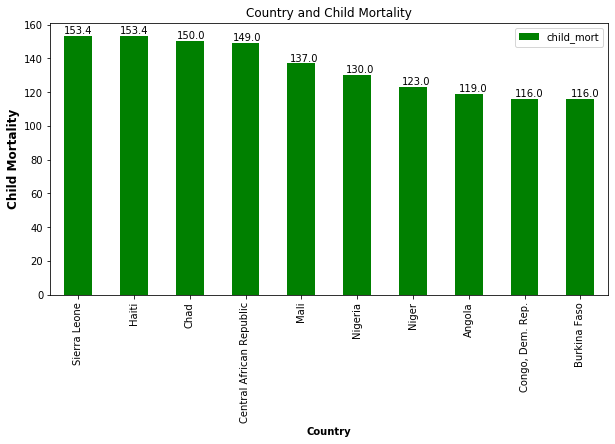

In [2044]:
# BarPlot for Child Mortality of countries which are in need of aid
df_list_cm = pd.DataFrame(FinalListbyHC.groupby(['country'])['child_mort'].mean().sort_values(ascending = False))
ax=df_list_cm.plot(kind = 'bar',figsize = (10,5), color ='g')
for p in ax.patches:
    ax.annotate(str(round(p.get_height(),2)), (p.get_x() * 1.01 , p.get_height() * 1.01))
plt.title('Country and Child Mortality')
plt.xlabel("Country",fontweight = 'bold')
plt.ylabel("Child Mortality", fontsize = 12, fontweight = 'bold')
plt.show()

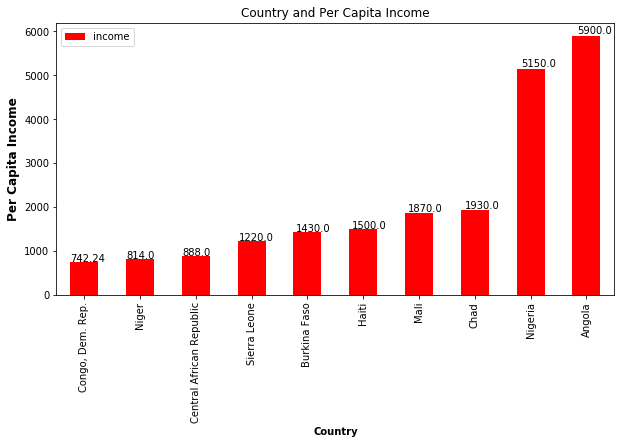

In [2045]:
# BarPlot for Per Capita Income of countries which are in need of aid

df_list_in = pd.DataFrame(FinalListbyHC.groupby(['country'])['income'].mean().sort_values(ascending = True))
ax=df_list_in.plot(kind = 'bar',figsize = (10,5),color= 'r')
for p in ax.patches:
    ax.annotate(str(round(p.get_height(),2)), (p.get_x() * 1.01 , p.get_height() * 1.01))
plt.title('Country and Per Capita Income')
plt.xlabel("Country",fontweight = 'bold')
plt.ylabel("Per Capita Income", fontsize = 12, fontweight = 'bold')
plt.show()

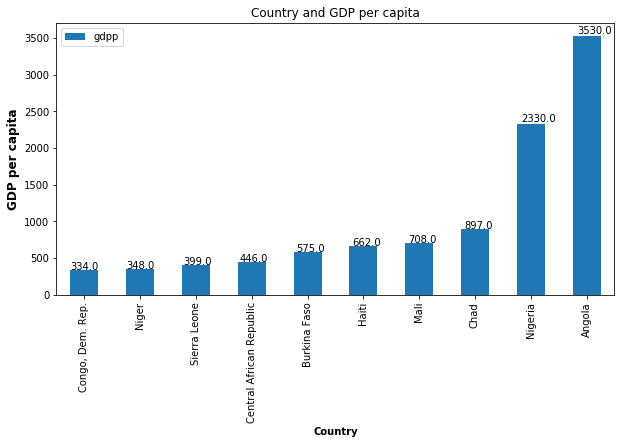

In [2046]:
# BarPlot for GDP of countries which are in need of aid

df_list_gdp =pd.DataFrame(FinalListbyHC.groupby(['country'])['gdpp'].mean().sort_values(ascending = True))
ax=df_list_gdp.plot(kind = 'bar',figsize = (10,5))
for p in ax.patches:
    ax.annotate(str(round(p.get_height(),2)), (p.get_x() * 1.01 , p.get_height() * 1.01))

plt.title('Country and GDP per capita')
plt.xlabel("Country",fontweight = 'bold')
plt.ylabel("GDP per capita", fontsize = 12, fontweight = 'bold')
plt.show()

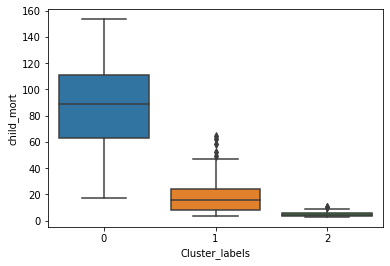

In [2047]:
# plot of child_mort for all clusters
sns.boxplot(x='Cluster_labels', y='child_mort', data=df_hc)

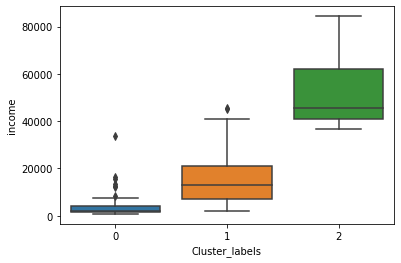

In [2048]:
# plot of Income for all clusters
sns.boxplot(x='Cluster_labels', y='income', data=df_hc)

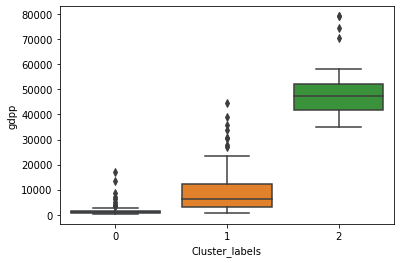

In [2049]:
# plot of gdpp for all clusters
sns.boxplot(x='Cluster_labels', y='gdpp', data=df_hc)

- We have analyzed both K-means and Hierarchial clustering and found clusters formed are identical.
- The time complexity of K Means is linear i.e. O(n) while that of hierarchical clustering is quadratic i.e. O(n2)
- Difference in execustion was not experienced as dataset was very small.
- K Means clustering requires prior knowledge of K i.e. no. of clusters we want to divide our data into. But, we can stop at whatever number of clusters we find appropriate in hierarchical clustering by interpreting the dendrogram
- So, we will proceed with the clusters formed by K-means and based on the information provided by the final clusters we will deduce the final list of countries which are in need of aid

# Final Analysis

In [2050]:
## Number of countries in each cluster in K-Means 
country_df.Cluster_Id.value_counts(ascending=True)

1    32
2    47
0    88
Name: Cluster_Id, dtype: int64

In [2051]:
## Number of countries in each cluster for Hierarchical clustering
df_hc.Cluster_labels.value_counts(ascending=True)

2    21
0    50
1    96
Name: Cluster_labels, dtype: int64

Though Required Clusters have same number of countries, but for Hierarchical clustering has more execution time compared to K-Mean

K-mean is an ideal algorithm for this problem statement. 

### Final List of countries which are in need of the aid based on socio-economic factors using K-means Clustering



In [2052]:
FinalListbyKMean=country_df[country_df['Cluster_Id']==2].sort_values(by = ['child_mort','income','gdpp',], ascending = [False, True, True])[:10]
FinalListbyKMean['country']
FinalListbyKMean.reset_index(drop=True).country[:10]


0                Sierra Leone
1                       Haiti
2                        Chad
3    Central African Republic
4                        Mali
5                     Nigeria
6                       Niger
7                      Angola
8            Congo, Dem. Rep.
9                Burkina Faso
Name: country, dtype: object

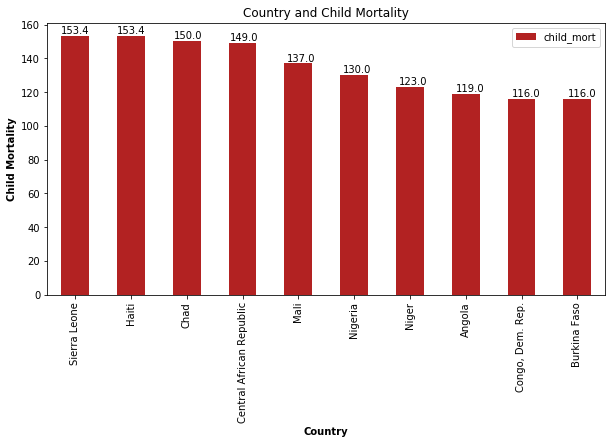

In [2053]:
# BarPlot for Child Mortality of countries which are in need of aid
df_list_cm = pd.DataFrame(FinalListbyKMean.groupby(['country'])['child_mort'].mean().sort_values(ascending = False))
ax=df_list_cm.plot(kind = 'bar',figsize = (10,5), color = 'firebrick')
for p in ax.patches:
    ax.annotate(str(round(p.get_height(),2)), (p.get_x() * 1.01 , p.get_height() * 1.01))
plt.title('Country and Child Mortality')
plt.xlabel("Country",fontweight = 'bold')
plt.ylabel("Child Mortality", fontsize = 10, fontweight = 'bold')
plt.show()

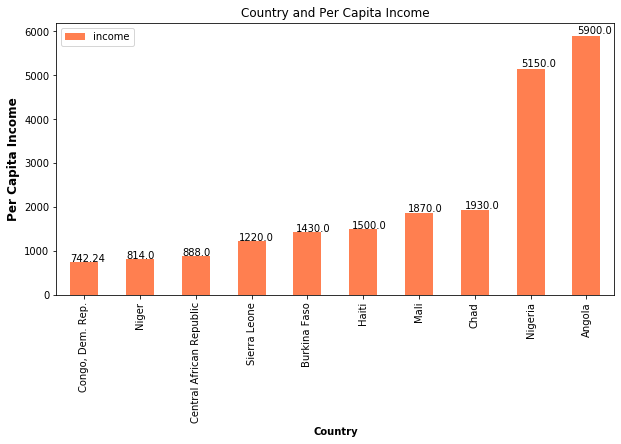

In [2054]:
# BarPlot for Per Capita Income of countries which are in need of aid

df_list_in = pd.DataFrame(FinalListbyKMean.groupby(['country'])['income'].mean().sort_values(ascending = True))
ax=df_list_in.plot(kind = 'bar',figsize = (10,5),color = 'coral')
for p in ax.patches:
    ax.annotate(str(round(p.get_height(),2)), (p.get_x() * 1.01 , p.get_height() * 1.01))
plt.title('Country and Per Capita Income')
plt.xlabel("Country",fontweight = 'bold')
plt.ylabel("Per Capita Income", fontsize = 12, fontweight = 'bold')
plt.show()

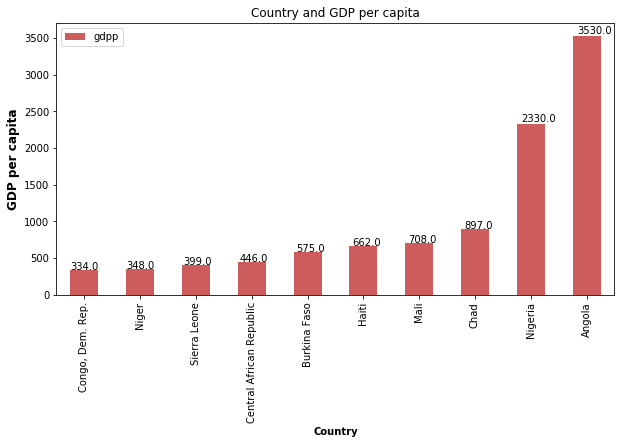

In [2055]:
# BarPlot for GDP of countries which are in need of aid

df_list_gdp =pd.DataFrame(FinalListbyKMean.groupby(['country'])['gdpp'].mean().sort_values(ascending = True))
ax=df_list_gdp.plot(kind = 'bar',figsize = (10,5), color ='indianred')
for p in ax.patches:
    ax.annotate(str(round(p.get_height(),2)), (p.get_x() * 1.01 , p.get_height() * 1.01))

plt.title('Country and GDP per capita')
plt.xlabel("Country",fontweight = 'bold')
plt.ylabel("GDP per capita", fontsize = 12, fontweight = 'bold')
plt.show()

# Conclusion

Thus from our above analysis , we can would recommend using K-means clustering Algorithm as it is an ideal solution for this problem. We also found out that some features like child_mort, income etc play vital role in determining the status of development of the countries

Below list of countries using the K- means which are in dire need of aid. The list of countries are subject to change as it is based on the few factors like Number of components chosen, Number of Clusters chosen, Clustering method used etc.which we have used to build the model.

In [2056]:
#FinalList with K-Means
FinalListbyKMean.reset_index(drop=True).country

0                Sierra Leone
1                       Haiti
2                        Chad
3    Central African Republic
4                        Mali
5                     Nigeria
6                       Niger
7                      Angola
8            Congo, Dem. Rep.
9                Burkina Faso
Name: country, dtype: object

In [2057]:
# Final countries list with Hierarchical clustering
FinalListbyHC.reset_index(drop=True).country

0                Sierra Leone
1                       Haiti
2                        Chad
3    Central African Republic
4                        Mali
5                     Nigeria
6                       Niger
7                      Angola
8            Congo, Dem. Rep.
9                Burkina Faso
Name: country, dtype: object

In [2058]:
# Final countries list
FinalListbyKMean.reset_index(drop=True).country

0                Sierra Leone
1                       Haiti
2                        Chad
3    Central African Republic
4                        Mali
5                     Nigeria
6                       Niger
7                      Angola
8            Congo, Dem. Rep.
9                Burkina Faso
Name: country, dtype: object